# TABLE OF CONTENTS

__1. Problem Description__
   - Objective
   - Dataset Description
   - Error Metric
   
__2. Importing required libraries__

__3. Loading dataset__

__4. Exploratory Data Analysis (EDA)__
   - Analysing variables using Dtale library
   - Checking shape,unique values,statistics and datatypes of data
   
__5. Preprocessing__
   - Dropping unnecessary variables
   - Checking Duplicate Columns and Rows
   - Typecasting obvious datatypes
   
__6. Chi-Square Dependency Test__

__7. Visualization__
   - Univariate Analysis on categorical columns
   - Bivariate Analysis on categorical columns
   - Probabilistic Analysis of categorical variables wrt Target
   - Distribution (Histogram) of numerical columns
   - Visualizing Boxplots for outliers
   
   __7.1. Removing Outliers__
   - Visualizing distplot for skewness of variables
        
__8. Binning on some features of Train/Test data__

__9. Analysing target variable__

__10. Splitting data into train and validation__

__11. Preperation for Model Building__
   - Checking and Imputing Missing values
   - Checking Multicollinearity
   - Target Encoding
   - Initiating Pipeline with Powertransformer and Onehotencoding
    
__12. Building Models__

# 1. Problem Description

### Flight Delay Analysis and Prediction

Air travel plays a significant role in the economies of both airlines and the airports, its very important to increase the quality of service for the passengers and every stakeholders involved. Flight delays cannot be prevented and plays a crucial role in an income of the airlines as well as customer satisfaction.

An accurate estimation of flight delays can be helpful in increasing customer satisfaction and also increasing the income of the concerned airlines.

Additionally, flight delays make passengers concerned and this leads to an extra expense for the airlines and the airports, as they need to provide accomodation and food as per the delay.

Flight Delays often lead to air traffic congestion due to subsequent flights which may troubles airport authorties.

Security, climate, weather conditions, scarcity of parts, air traffic are some of the reasons which leads to flight delays.

### Objective :

Target attribute: __"FlightDelayStatus"__ (discrete variable: 2 classes)
 - 1 : If Flight is delayed by more than 15 minutes
 - 2 : Flight not delayed
 
### Dataset Description:

Datasets provided are as follows :
 - __Flights Data:__
"Train.csv" & "Test.csv" consisting of flight details like ID, origin, destination, timestamps etc. and Target Attribute "FlightDelayStatus" to be derived from ActualArrivalTimeStamp.

 - __AllStationsData_PHD:__
This flie gives the link of "WeatherStationID"  & "AirportID" and has the attributes viz.,  Latitude, Longitude, TimeZone etc
                                                         
 - __Weather information:__
Folder “weatherdatatoconsider” has sub-folders 2004 and 2005. These files consist of the details about aviation weather during the 2004 and 2005  
          

### Error Metric for checking Model Performance : F1 Score



# 2. Importing required packages

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import PIL                                          # to read images
from PIL import Image

import dtale                                        #importing dtale library for analysis of variables

import lux                                          #importing lux library to facilitate visualization for further analysis
lux.logger = True

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer                                # Knn Imputation function
from sklearn.preprocessing import StandardScaler, OneHotEncoder            
from sklearn.preprocessing import PowerTransformer                   # Power transformer for removing skewness and scaling
from scipy.stats import skew                                         # importing skew function
import category_encoders as ce                                       # importing target encoders
#import statsmodels.api as sm

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from vecstack import stacking

# 3. Loading  Data

In [3]:
os.getcwd()    #Getting Current working directry

'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall'

In [4]:
#os.listdir(r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall')   #list of sub folders in current directory

In [5]:
path = r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall'   # Defining path

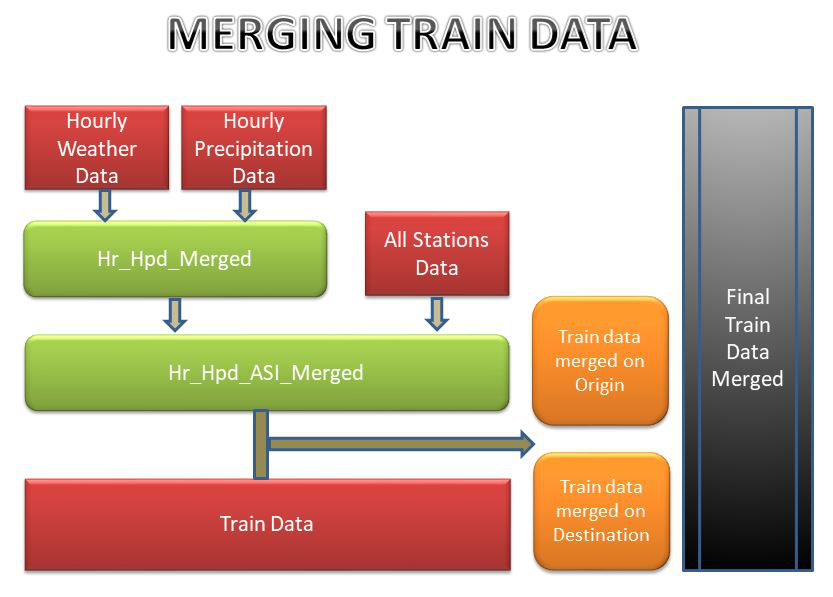

In [6]:
## Display Merge process
merge = Image.open(r'C:\\Users\\Himanshu\\Downloads\\DataForPHD_Forall\\Merge_photo.jpg')
merge

In [7]:
#Loading merged data 

train_data = pd.read_csv(r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall\\Merged_data.csv', na_values = ["?","#"," "])
test_data = pd.read_csv(r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall\\Merged_data_test.csv', na_values = ["?","#"," "])

In [8]:
# resetting the index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# 4. Exploratory Data Analysis (EDA) - Understanding data

In [9]:
train_data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,...,WindDirection_max_des,WindGustValue_max_des,StationPressure_mean_des,AirportID_des,GroundHeight_des,StationHeight_des,BarometerHeight_des,Latitude_des,Longitude_des,TimeZone_des
0,0,2004,9,20,1,1000,1154,114,BOS,CLE,...,210.0,0.0,29.493750,CLE,802,805,805,41.24,-81.51,5
1,1,2004,11,19,5,1440,1634,114,CLE,ATL,...,210.0,0.0,29.089167,ATL,971,1026,974,33.38,-84.26,5
2,2,2004,11,19,5,1650,1843,113,CLE,ATL,...,210.0,0.0,29.089167,ATL,971,1026,974,33.38,-84.26,5
3,3,2004,11,19,5,1615,1717,62,CLE,MDT,...,310.0,0.0,29.792917,MDT,311,312,314,40.11,-76.46,5
4,4,2004,5,4,2,1800,1902,62,SNA,LAS,...,300.0,21.0,27.630833,LAS,2127,2180,2091,36.05,-115.10,8


In [10]:
test_data.head()

,Unnamed: 0,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,...,WindDirection_max_des,WindGustValue_max_des,StationPressure_mean_des,AirportID_des,GroundHeight_des,StationHeight_des,BarometerHeight_des,Latitude_des,Longitude_des,TimeZone_des
0,0,DEN_XNA_62349,2005,9,12,1,1516,1756,100,DEN,...,210.0,20.0,28.708333,XNA,1269,1319,1272,36.17,-94.19,6
1,1,DEN_PDX_102547,2005,9,12,1,1423,1553,150,DEN,...,360.0,0.0,29.826667,PDX,220,107,223,45.35,-122.36,8
2,2,RIC_EWR_87213,2005,11,14,1,1300,1415,75,RIC,...,360.0,21.0,30.231250,EWR,25,30,28,40.43,-74.10,5
3,3,IAD_GSO_86576,2005,9,28,3,1040,1144,64,IAD,...,200.0,0.0,29.140833,GSO,904,886,907,36.06,-79.56,5
4,4,IAD_GSP_89545,2005,9,28,3,1230,1353,83,IAD,...,80.0,0.0,29.062500,GSP,940,971,943,34.54,-82.13,5


###### Analysing Independent Attributes using dtale library

In [11]:
dtale.show(train_data)             # Using Dtale function for analysing Independent attributes

In [12]:
print(train_data.columns)          #column names

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Origin',
       'Destination', 'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus',
       'WeatherStationID_ori', 'DayOfMonth_x', 'HourlyPrecip_sum_ori',
       'Visibility_min_ori', 'Visibility_max_ori', 'Visibility_mean_ori',
       'DBT_mean_ori', 'DewPointTemp_mean_ori',
       'RelativeHumidityPercent_mean_ori', 'WindSpeed_max_ori',
       'WindSpeed_mean_ori', 'WindDirection_mean_ori', 'WindDirection_max_ori',
       'WindGustValue_max_ori', 'StationPressure_mean_ori', 'AirportID_ori',
       'GroundHeight_ori', 'StationHeight_ori', 'BarometerHeight_ori',
       'Latitude_ori', 'Longitude_ori', 'TimeZone_ori', 'WeatherStationID_des',
       'DayOfMonth_y', 'HourlyPrecip_sum_des', 'Visibility_min_des',
       'Visibility_max_des', 'Visibility_mean_des', 'DBT_mean_des',
    

In [13]:
print(train_data.shape)               #dimensions of train_data
print(test_data.shape)                #dimensions of test_data

(7861, 60)
(6566, 56)


In [14]:
train_data.info()                     # statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7861 non-null   int64  
 1   Year                              7861 non-null   int64  
 2   Month                             7861 non-null   int64  
 3   DayofMonth                        7861 non-null   int64  
 4   DayOfWeek                         7861 non-null   int64  
 5   ScheduledDepTime                  7861 non-null   int64  
 6   ScheduledArrTime                  7861 non-null   int64  
 7   ScheduledTravelTime               7861 non-null   int64  
 8   Origin                            7861 non-null   object 
 9   Destination                       7861 non-null   object 
 10  Distance                          7861 non-null   int64  
 11  FlightNo                          7861 non-null   int64  
 12  actual

In [15]:
train_data.describe(include='all').T  #Checking distribution of data wrt all columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,7861,NaN,NaN,NaN,3930,2269.42,0,1965,3930,5895,7860
Year,7861,NaN,NaN,NaN,2004,0,2004,2004,2004,2004,2004
Month,7861,NaN,NaN,NaN,7.12085,2.82233,1,5,7,9,11
DayofMonth,7861,NaN,NaN,NaN,15.4413,9.04902,1,7,15,23,31
DayOfWeek,7861,NaN,NaN,NaN,3.96095,1.98092,1,2,4,6,7
ScheduledDepTime,7861,NaN,NaN,NaN,1198.23,354.923,215,900,1215,1518,1800
ScheduledArrTime,7861,NaN,NaN,NaN,1412.23,369.739,553,1111,1430,1728,2300
ScheduledTravelTime,7861,NaN,NaN,NaN,129.624,63.2721,61,83,112,155,562
Origin,7861,223,ATL,508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,7861,215,ATL,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Observation :__

 - This table gives the intuition as some of the features may have outliers....as GroundHeight_des, StationHeight_des etc.

# 5. Preprocessing 

### Drop Unnecessary Variables from Train Data and Test Data

In [16]:
train_data.nunique().to_dict()                   # Checking unique values of all variables

{'Unnamed: 0': 7861,
 'Year': 1,
 'Month': 6,
 'DayofMonth': 31,
 'DayOfWeek': 7,
 'ScheduledDepTime': 681,
 'ScheduledArrTime': 912,
 'ScheduledTravelTime': 324,
 'Origin': 223,
 'Destination': 215,
 'Distance': 984,
 'FlightNo': 7861,
 'actual_arrival_time_mins': 959,
 'scheduled_total_time_mins': 912,
 'DelayInMinutes': 160,
 'FlightDelayStatus': 2,
 'WeatherStationID_ori': 223,
 'DayOfMonth_x': 31,
 'HourlyPrecip_sum_ori': 336,
 'Visibility_min_ori': 20,
 'Visibility_max_ori': 13,
 'Visibility_mean_ori': 1797,
 'DBT_mean_ori': 1451,
 'DewPointTemp_mean_ori': 1488,
 'RelativeHumidityPercent_mean_ori': 1644,
 'WindSpeed_max_ori': 42,
 'WindSpeed_mean_ori': 2316,
 'WindDirection_mean_ori': 2941,
 'WindDirection_max_ori': 36,
 'WindGustValue_max_ori': 46,
 'StationPressure_mean_ori': 4346,
 'AirportID_ori': 223,
 'GroundHeight_ori': 199,
 'StationHeight_ori': 187,
 'BarometerHeight_ori': 198,
 'Latitude_ori': 201,
 'Longitude_ori': 211,
 'TimeZone_ori': 7,
 'WeatherStationID_des': 215,

In [17]:
train_data.drop("Year",axis=1,inplace=True)     # Dropping zero Variance Columns
test_data.drop("Year",axis=1,inplace=True)

In [18]:
train_data.drop(["Unnamed: 0", "FlightNo"], axis = 1, inplace = True)      # Dropping columns with all unique values
test_data.drop(["Unnamed: 0", "FlightNumber"], axis = 1, inplace = True)

### Checking duplicate columns

In [19]:
## This function take a dataframe as a parameter and returning list of column names whose contents are duplicates.

def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
        # Iterate through all the columns of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in DataFrame from (x + 1)th index to last index
        for y in range(x + 1, df.shape[1]):
              
        # Take column at yth index.
            otherCol = df.iloc[:, y]
              
        # Check if two columns at x & y index are equal or not, if equal then adding to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
        # Return list of unique column names whose contents are duplicates.
    return list(duplicateColumnNames)

duplicateColNames = getDuplicateColumns(train_data)
print(duplicateColNames)

['AirportID_des', 'DayOfMonth_x', 'DayOfMonth_y', 'AirportID_ori']


In [20]:
# Dropping Duplicate columns from train_data and test_data

train_data.drop(['AirportID_ori', 'DayOfMonth_y', 'AirportID_des', 'DayOfMonth_x'], axis = 1, inplace = True)
test_data.drop(['AirportID_ori', 'DayOfMonth_y', 'AirportID_des', 'DayOfMonth_x'], axis = 1, inplace = True)

### Checking duplicate rows

In [21]:
# Select duplicate rows except first occurrence based on all columns  

duplicateRowsDF = train_data[train_data.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
#print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :


__Observation :__
No Duplicate rows present in Train_data

In [22]:
# Dropping columns that cannot be captured in test_data as they cannot help in prediction (related only to target):

train_data.drop(['actual_arrival_time_mins', 'scheduled_total_time_mins','DelayInMinutes' ], axis = 1, inplace = True)

In [23]:
print(train_data.shape)
print(test_data.shape)

(7861, 50)
(6566, 49)


__Observation__

- Dropped Columns from train data based on Zero Variance, All Unique Values and Duplicate columns

## Checking Datatypes & Typecasting obvious ones

In [24]:
train_data.head().T

,0,1,2,3,4
Month,9,11,11,11,5
DayofMonth,20,19,19,19,4
DayOfWeek,1,5,5,5,2
ScheduledDepTime,1000,1440,1650,1615,1800
ScheduledArrTime,1154,1634,1843,1717,1902
ScheduledTravelTime,114,114,113,62,62
Origin,BOS,CLE,CLE,CLE,SNA
Destination,CLE,ATL,ATL,MDT,LAS
Distance,563,554,554,280,226
FlightDelayStatus,2,1,1,1,2


In [25]:
train_data.dtypes

Month                                 int64
DayofMonth                            int64
DayOfWeek                             int64
ScheduledDepTime                      int64
ScheduledArrTime                      int64
ScheduledTravelTime                   int64
Origin                               object
Destination                          object
Distance                              int64
FlightDelayStatus                     int64
WeatherStationID_ori                  int64
HourlyPrecip_sum_ori                float64
Visibility_min_ori                  float64
Visibility_max_ori                  float64
Visibility_mean_ori                 float64
DBT_mean_ori                        float64
DewPointTemp_mean_ori               float64
RelativeHumidityPercent_mean_ori    float64
WindSpeed_max_ori                   float64
WindSpeed_mean_ori                  float64
WindDirection_mean_ori              float64
WindDirection_max_ori               float64
WindGustValue_max_ori           

In [26]:
# Typecasting datatype to category based on number of unique values and domain knowledge

for col in ['Month','DayofMonth','DayOfWeek','Origin','Destination',"FlightDelayStatus","TimeZone_des","TimeZone_ori","WeatherStationID_ori","WeatherStationID_des"]:
    train_data[col] = train_data[col].astype('category')
    
for col in ['Month','DayofMonth','DayOfWeek','Origin','Destination',"TimeZone_des","TimeZone_ori","WeatherStationID_ori","WeatherStationID_des"]:
    test_data[col] = test_data[col].astype('category')


In [27]:
train_data.dtypes

Month                               category
DayofMonth                          category
DayOfWeek                           category
ScheduledDepTime                       int64
ScheduledArrTime                       int64
ScheduledTravelTime                    int64
Origin                              category
Destination                         category
Distance                               int64
FlightDelayStatus                   category
WeatherStationID_ori                category
HourlyPrecip_sum_ori                 float64
Visibility_min_ori                   float64
Visibility_max_ori                   float64
Visibility_mean_ori                  float64
DBT_mean_ori                         float64
DewPointTemp_mean_ori                float64
RelativeHumidityPercent_mean_ori     float64
WindSpeed_max_ori                    float64
WindSpeed_mean_ori                   float64
WindDirection_mean_ori               float64
WindDirection_max_ori                float64
WindGustVa

# 6. Chi square test: check dependency of categorical columns with Target

In [28]:
from scipy.stats import chi2_contingency              # importing
import statsmodels.api as sm

In [29]:
cat_cols = train_data.select_dtypes('category').columns
cat_cols

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Destination',
       'FlightDelayStatus', 'WeatherStationID_ori', 'TimeZone_ori',
       'WeatherStationID_des', 'TimeZone_des'],
      dtype='object')

In [30]:
## Defining Function for Chi-square test

def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [31]:
for col in cat_cols:                                           #Chi-Square Dependency test for Categorical Columns
    find_chi2_independence(col, 'FlightDelayStatus', train_data)

---------------FlightDelayStatus Vs Month Chi Square Test of Independence -------------------

 Contingency table :

[[  89  145  290  304  223  468]
 [ 141  810 1442 1459 1332 1158]]

 Expected table :

[[  44.44345503  184.53695459  334.67853963  340.66874443  300.47640249
   314.19590383]
 [ 185.55654497  770.46304541 1397.32146037 1422.33125557 1254.52359751
  1311.80409617]]
The p value returned = 1.8114465213032047e-40 and degrees of freedom returned = 5
significance(alpha) = 0.050
Dependent (reject H0)
---------------FlightDelayStatus Vs DayofMonth Chi Square Test of Independence -------------------

 Contingency table :

[[ 76  55  56 106  27  12  25  34  17  17  41  73  55  36  40  42  86  52
   51  44  63  88  66  79  24  24  36  65  28  54  47]
 [200 242 264 238 232 232 235 183 253 222 227 230 194 185 179 201 146 201
  181 173 205 182 192 184 181 202 207 223 195 218 135]]

 Expected table :

[[ 53.33214604  57.39002671  61.83437222  66.47195013  50.04719501
   47.14870882  5

---------------FlightDelayStatus Vs WeatherStationID_ori Chi Square Test of Independence -------------------

 Contingency table :

[[ 26   3   8   0   3   4   0   4   3   2   2  90   3   5  11   0   0   0
    3   6   0   1   1  15   1   3   0   1   4  11   4   8   0   0   0   0
    1   2   1   7   0  10   4   0  46   3  15  10   0   9  26   6   4  22
    1   0   1   2   0   3 185  10   1   4  17   2   4   6   2   7   2   1
   15   4  11   1   4   3   2  11   0   5   3   1   1   0   0  10   1   0
    8   3  39  12  52   2   1  42   7   0   1   2   7  11   6   3  13  27
   12   1   0   3   5   2   0   0   2   0   0   6   2   0   0   1  46   0
    0   8   0   1   0   1   0   0   0   1   1   4   0   0   2   0   1   1
    4   2   1   9  18   4   0   0   2   0   5   6   1   1   0   1   0   0
    1   0  13   0   0   0   1   0   1   4   1   1   1   1   6  20   0   1
    1   0   0   0   0   1   1   0   3   1   0   3   0   1   3   3   0   6
   15   2   2  41   0   1   1  74   6   2   7   2   5 

 __Observation__ 

- All categorical columns are dependent to target variable "FlightDelayStatus"

#  7. Visualization
------------------------

In [32]:
## Custom Function for Flight Delay Probability on numerical columns

def getProbOfDelay(col, target, df, forGraph=True):
    crosstab = pd.crosstab(index = df[col], columns = df[target])
    crosstab.columns = pd.Index(list(crosstab.columns))
    crosstab = crosstab.reset_index() 
    crosstab['TotalCount'] = crosstab[1] + crosstab[2]
    crosstab['ProbOfDelay'] = crosstab[1] / crosstab['TotalCount']
    
    print(crosstab.head())
    if forGraph:
        return crosstab[[col, 'ProbOfDelay']]
    else:
        return crosstab[[col, 'TotalCount', 'ProbOfDelay']]

In [33]:
## Custom Function for Delay Probability on categorical columns

def probStatusCategorical(col_list):
    rows = []
    for item in col_list:
        for level in train_data[item].unique():
            row = {'Condition': item}
            ## Finding count of rows with that level in categorical column
            total = len(train_data[train_data[item] == level])
            ## Finding count of rows where level and "1" in Flight Delay match
            n = len(train_data[(train_data[item] == level) & (train_data['FlightDelayStatus'] == 1)])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

In [34]:
## Custom Function for Bar Plots

def barplot(column,df):
    bar_plot1 = sns.countplot(x=column, data=df)
    #plt.figure(figsize = (12, 6))
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

### Analysing Categorical Columns

In [35]:
train_data.describe(include='category')

,Month,DayofMonth,DayOfWeek,Origin,Destination,FlightDelayStatus,WeatherStationID_ori,TimeZone_ori,WeatherStationID_des,TimeZone_des
count,7861,7861,7861,7861,7861,7861,7861,7861,7861,7861
unique,6,31,7,223,215,2,223,7,215,7
top,7,4,4,ATL,ATL,2,13874,5,13874,5
freq,1763,344,1172,508,621,6342,508,3612,621,3716


### Univariate Analysis on Categorical Columns

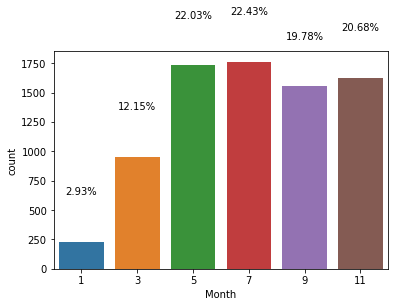

In [36]:
barplot("Month",train_data)

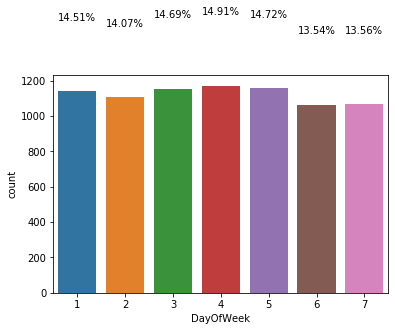

In [37]:
barplot("DayOfWeek",train_data)

 __Observation__ 

- Almost every day of week has same frequency of flights

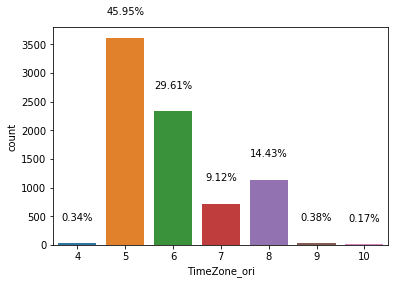

In [38]:
barplot("TimeZone_ori",train_data)     

In [39]:
#Binning of categories can be done as they give approx  1% relevance togeather

train_data['TimeZone_ori'] = train_data['TimeZone_ori'].replace([9,10],4)
test_data['TimeZone_ori'] = test_data['TimeZone_ori'].replace([9,10],4)

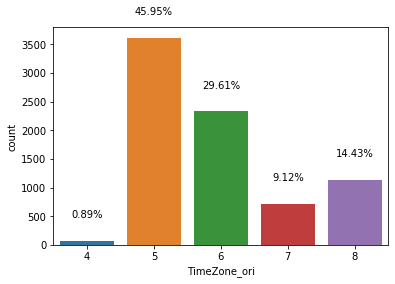

In [40]:
barplot("TimeZone_ori",train_data) 

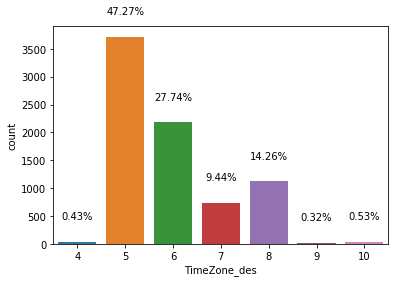

In [41]:
barplot("TimeZone_des",train_data)

In [42]:
#Binning of categories can be done as they give approx  1% relevance togeather

train_data['TimeZone_des'] = train_data['TimeZone_des'].replace([9,10],4)
test_data['TimeZone_des'] = test_data['TimeZone_des'].replace([9,10],4)

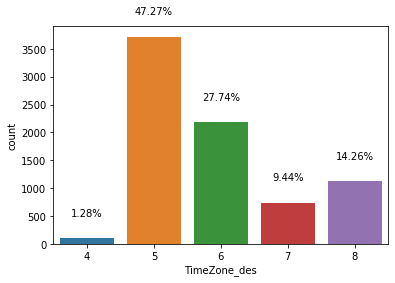

In [43]:
barplot("TimeZone_des",train_data)

In [44]:
train_data.describe(include='category').head(1)

,Month,DayofMonth,DayOfWeek,Origin,Destination,FlightDelayStatus,WeatherStationID_ori,TimeZone_ori,WeatherStationID_des,TimeZone_des
count,7861,7861,7861,7861,7861,7861,7861,7861,7861,7861


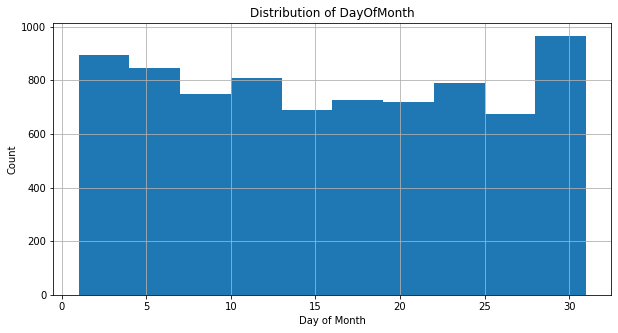

In [45]:
# Histogram plot for getting the distribution of large no. of levels

train_data['DayofMonth'].hist(figsize=(10, 5));
plt.xlabel("Day of Month")
plt.ylabel("Count")
plt.title("Distribution of DayOfMonth")

plt.show()



__Observation :__

 - Number of flights across the month is evenly distributed 

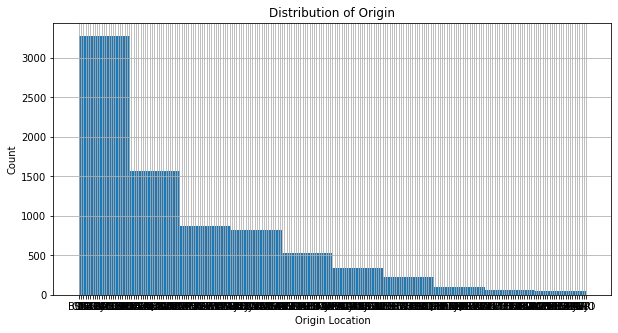

In [46]:
train_data['Origin'].hist(figsize=(10, 5));
plt.xlabel("Origin Location")
plt.ylabel("Count")
plt.title("Distribution of Origin")

plt.show()

__Observation__ 
 - Right Skewed, More intuitive visualization must be done(~Tableau) 
 - Need to do Transformation (~ Log, sqrt)


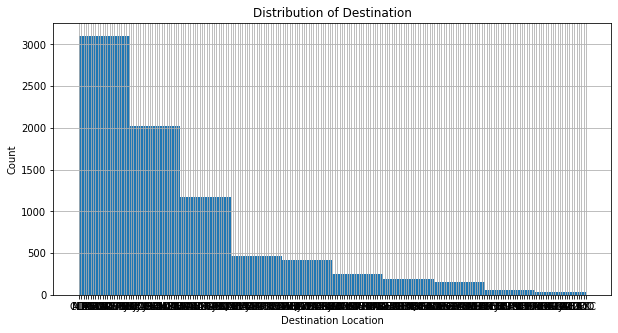

In [47]:
train_data['Destination'].hist(figsize=(10, 5));
plt.xlabel("Destination Location")
plt.ylabel("Count")
plt.title("Distribution of Destination")

plt.show()

__Observation__ 
 - Right Skewed, More intuitive visualization must be done(~Tableau) 
 - Need to do Transformation (~ Log, sqrt)

### Bivariate Analysis on categorical columns

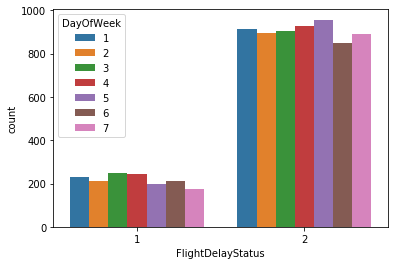

In [48]:
# Visualizing the importance of variable wrt FlightDelayStatus
train_data[train_data.FlightDelayStatus == 1].DayOfWeek.value_counts(normalize=True)*100
sns.countplot(x='FlightDelayStatus', hue = "DayOfWeek", data=train_data) 
plt.show()

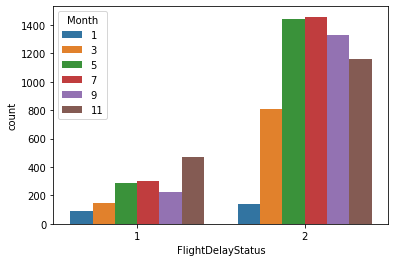

In [49]:
# Visualizing the importance of variable wrt FlightDelayStatus
train_data[train_data.FlightDelayStatus == 1].Month.value_counts(normalize=True)*100
sns.countplot(x='FlightDelayStatus', hue = "Month", data=train_data) 
plt.show()

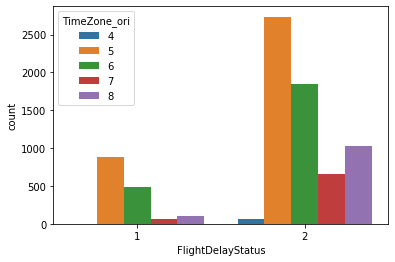

In [50]:
# Visualizing the importance of variable wrt FlightDelayStatus
train_data[train_data.FlightDelayStatus == 1].TimeZone_ori.value_counts(normalize=True)*100
sns.countplot(x='FlightDelayStatus', hue = "TimeZone_ori", data=train_data) 
plt.show()

__Observation__ 

 - Month , Dayofweek , Timezone can be goot predictor for Flight Delay Status

### Probabilistic Analysis of Categorical columns on Flight Delay

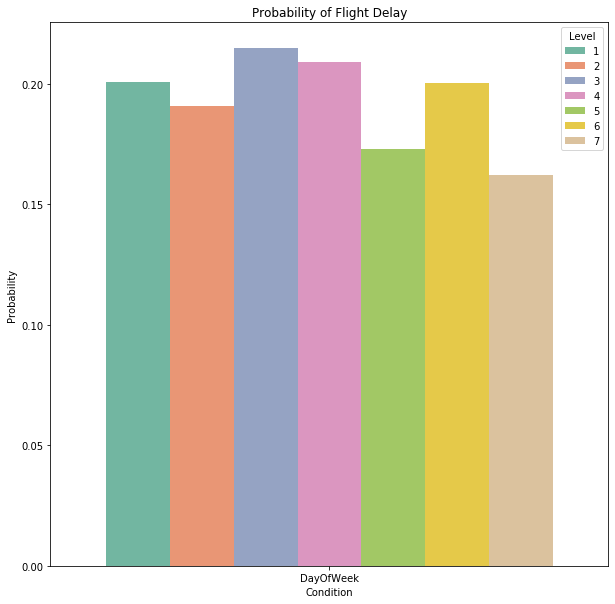

In [51]:
## Probability of fight Delay wrt DayOfWeek
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['DayOfWeek']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Flight Delay')
plt.ylabel('Probability')
plt.show()

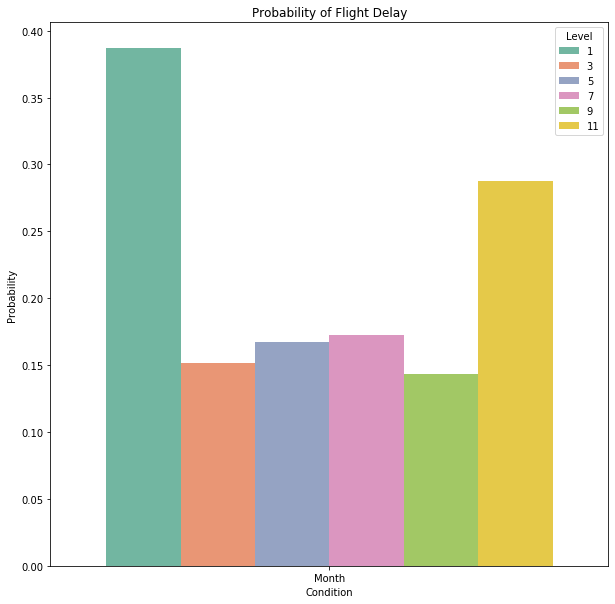

In [52]:
## Probability of fight Delay wrt Month
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['Month']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Flight Delay')
plt.ylabel('Probability')
plt.show()

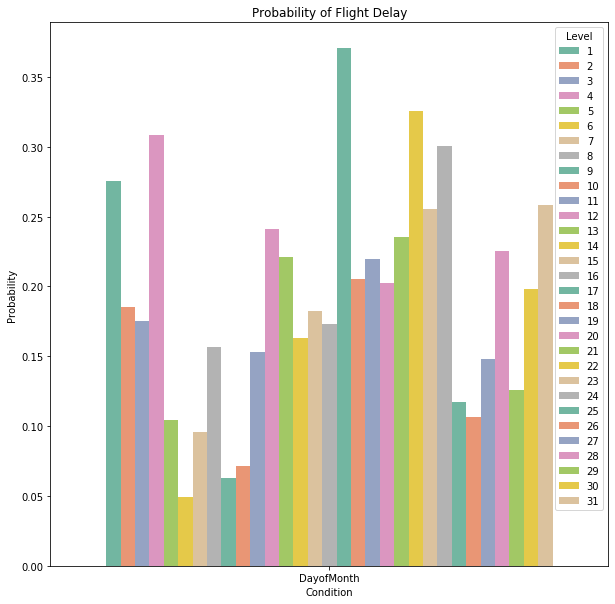

In [53]:
## Probability of fight Delay wrt DayofMonth
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['DayofMonth']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Flight Delay')
plt.ylabel('Probability')
plt.show()

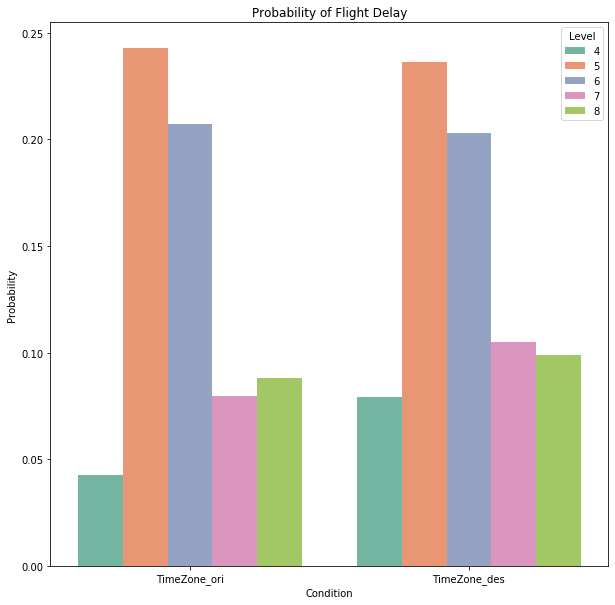

In [54]:
## Probability of fight Delay wrt TimeZone
plt.figure(figsize=(10,10))
sns.barplot(data = probStatusCategorical(['TimeZone_ori','TimeZone_des']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
plt.title('Probability of Flight Delay')
plt.ylabel('Probability')
plt.show()

### Analysing Numerical Columns

In [55]:
train_data.corr()                # Correlation between independent variables

,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Distance,HourlyPrecip_sum_ori,Visibility_min_ori,Visibility_max_ori,Visibility_mean_ori,DBT_mean_ori,DewPointTemp_mean_ori,...,WindSpeed_mean_des,WindDirection_mean_des,WindDirection_max_des,WindGustValue_max_des,StationPressure_mean_des,GroundHeight_des,StationHeight_des,BarometerHeight_des,Latitude_des,Longitude_des
ScheduledDepTime,1.000000,0.928916,-0.048108,-0.063890,0.067081,-0.057328,-0.015231,-0.044341,0.025919,0.050661,...,0.032876,0.015659,-0.005755,0.038256,0.025350,-0.029482,-0.029729,-0.028808,0.008526,0.031358
ScheduledArrTime,0.928916,1.000000,0.180846,0.185344,0.046425,-0.017140,-0.005780,-0.009751,0.026327,0.023124,...,0.049516,0.007325,-0.026467,0.036750,0.067909,-0.070020,-0.070207,-0.069024,-0.008462,0.091125
ScheduledTravelTime,-0.048108,0.180846,1.000000,0.984547,0.013288,0.037832,0.002549,0.032706,-0.001386,-0.001735,...,0.039344,0.004707,-0.010248,-0.014607,0.058895,-0.061368,-0.062844,-0.061672,-0.106472,-0.206980
Distance,-0.063890,0.185344,0.984547,1.000000,0.004154,0.056740,0.007488,0.050805,0.011306,-0.004941,...,0.038278,-0.002170,-0.011493,-0.013455,0.052187,-0.054331,-0.056099,-0.054464,-0.106031,-0.202225
HourlyPrecip_sum_ori,0.067081,0.046425,0.013288,0.004154,1.000000,-0.433827,-0.042811,-0.421327,0.045043,0.214729,...,0.010512,-0.004776,-0.004961,0.020143,0.034897,-0.046512,-0.046641,-0.046312,-0.032563,0.068064
Visibility_min_ori,-0.057328,-0.017140,0.037832,0.056740,-0.433827,1.000000,0.206723,0.813550,0.049971,-0.307093,...,0.010579,0.027018,0.035480,-0.016162,-0.058721,0.070925,0.070652,0.070720,0.028515,-0.148654
Visibility_max_ori,-0.015231,-0.005780,0.002549,0.007488,-0.042811,0.206723,1.000000,0.473910,0.092739,-0.001384,...,0.040111,0.027443,0.060319,0.038459,-0.019294,0.014041,0.014123,0.014037,0.001996,-0.004001
Visibility_mean_ori,-0.044341,-0.009751,0.032706,0.050805,-0.421327,0.813550,0.473910,1.000000,0.140518,-0.174281,...,0.047504,0.047258,0.042328,0.028275,-0.051917,0.057035,0.056834,0.056807,0.028904,-0.109604
DBT_mean_ori,0.025919,0.026327,-0.001386,0.011306,0.045043,0.049971,0.092739,0.140518,1.000000,0.791874,...,-0.054245,-0.008093,-0.010381,0.006410,0.005092,-0.035582,-0.033725,-0.035395,-0.070073,0.062975
DewPointTemp_mean_ori,0.050661,0.023124,-0.001735,-0.004941,0.214729,-0.307093,-0.001384,-0.174281,0.791874,1.000000,...,-0.054158,-0.036207,-0.044211,0.009623,0.072571,-0.103473,-0.100675,-0.102990,-0.073535,0.183281


In [56]:
#plt.figure(figsize =(80,80))
#sns.heatmap(train_data.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

__Observation__

Some of the columns are highly co-related....we will remove multicollinear variables after standardization

Example : ScheduledArrTime to ScheduledDepTime etc.

### Histogram of  Numerical Columns

In [57]:
cat_cols = train_data.select_dtypes('category').columns   # Mapping categorical columns
cat_cols

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Destination',
       'FlightDelayStatus', 'WeatherStationID_ori', 'TimeZone_ori',
       'WeatherStationID_des', 'TimeZone_des'],
      dtype='object')

In [58]:
num_cols=list(train_data.columns.difference(cat_cols))    # Mapping Numerical Columns
print(num_cols)

['BarometerHeight_des', 'BarometerHeight_ori', 'DBT_mean_des', 'DBT_mean_ori', 'DewPointTemp_mean_des', 'DewPointTemp_mean_ori', 'Distance', 'GroundHeight_des', 'GroundHeight_ori', 'HourlyPrecip_sum_des', 'HourlyPrecip_sum_ori', 'Latitude_des', 'Latitude_ori', 'Longitude_des', 'Longitude_ori', 'RelativeHumidityPercent_mean_des', 'RelativeHumidityPercent_mean_ori', 'ScheduledArrTime', 'ScheduledDepTime', 'ScheduledTravelTime', 'StationHeight_des', 'StationHeight_ori', 'StationPressure_mean_des', 'StationPressure_mean_ori', 'Visibility_max_des', 'Visibility_max_ori', 'Visibility_mean_des', 'Visibility_mean_ori', 'Visibility_min_des', 'Visibility_min_ori', 'WindDirection_max_des', 'WindDirection_max_ori', 'WindDirection_mean_des', 'WindDirection_mean_ori', 'WindGustValue_max_des', 'WindGustValue_max_ori', 'WindSpeed_max_des', 'WindSpeed_max_ori', 'WindSpeed_mean_des', 'WindSpeed_mean_ori']


## Distribution Of numerical Features

In [59]:
### Function for displaying Histogram Plot
    
def hist(data, column):
    plt.figure(figsize=(10, 5))
    plt.hist(data[column])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title("Distribution Plot")

    plt.show()
   

#### Checking the the distribution of all numerical columns

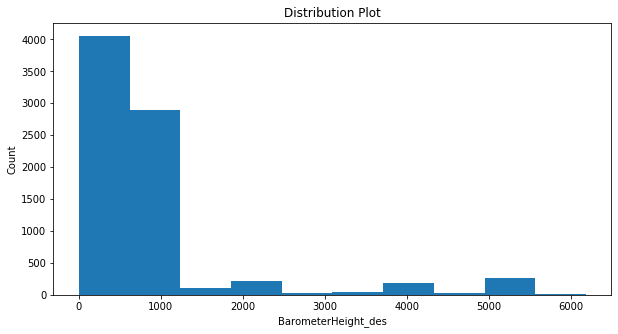

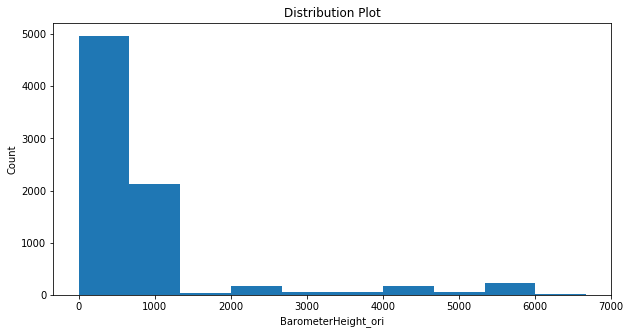

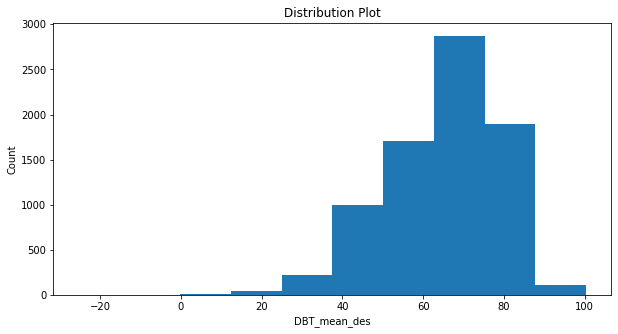

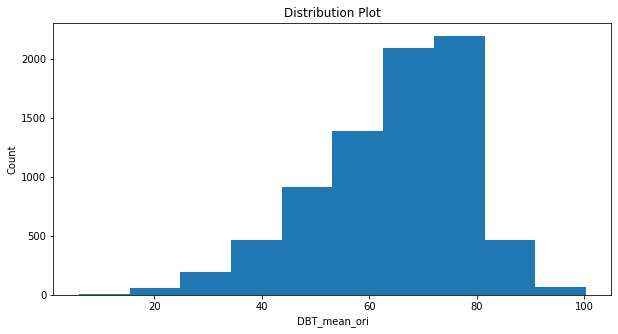

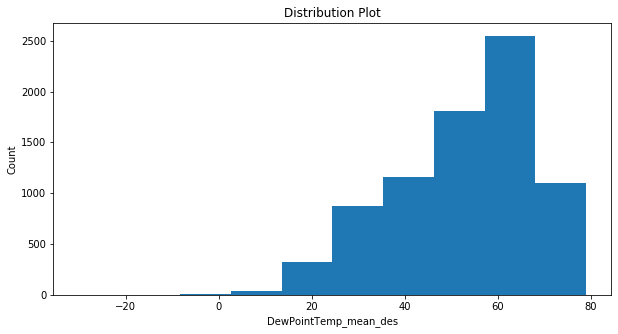

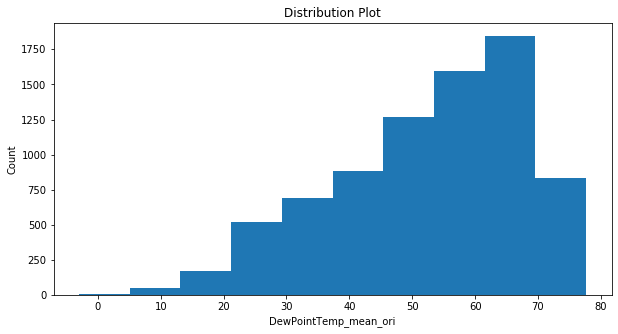

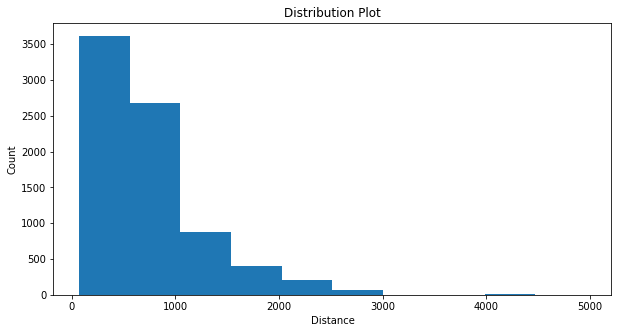

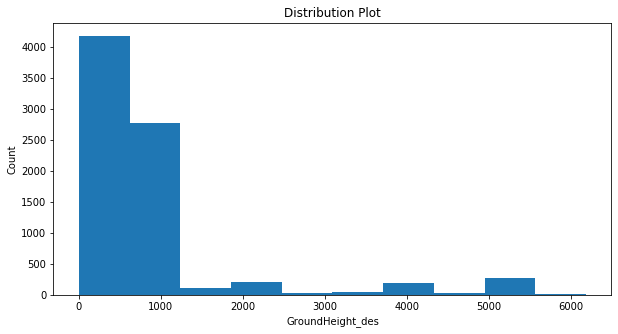

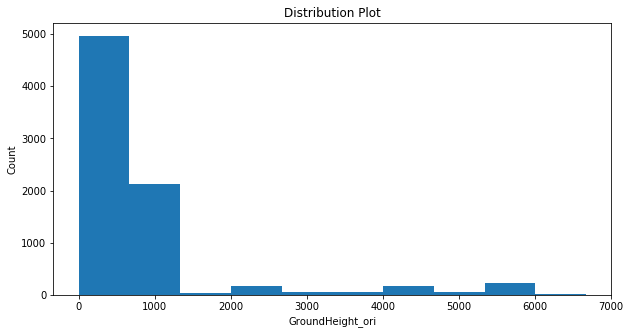

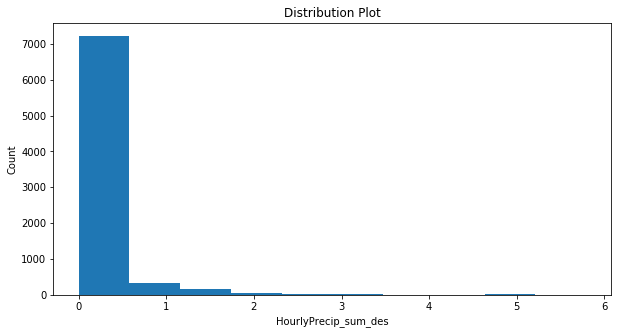

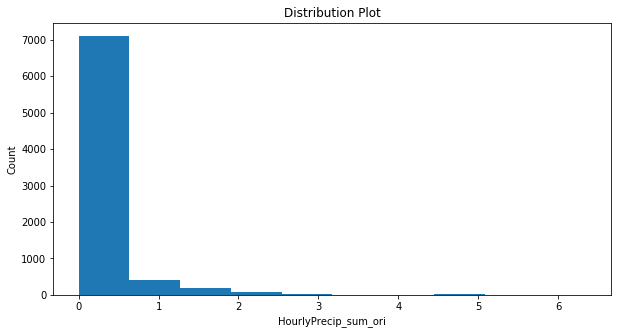

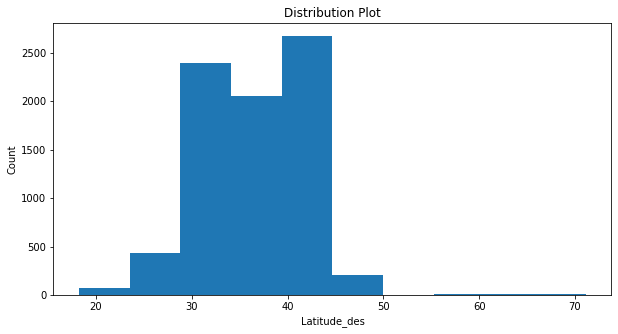

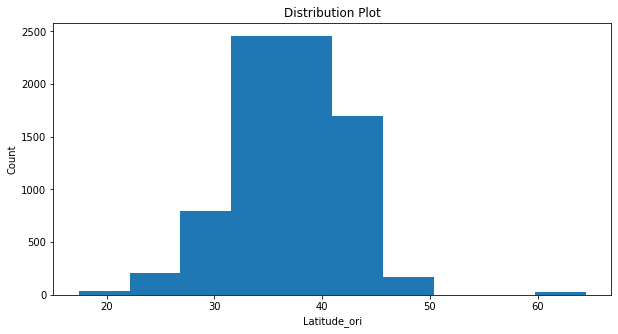

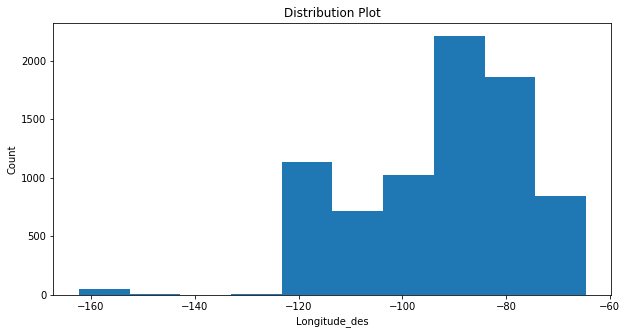

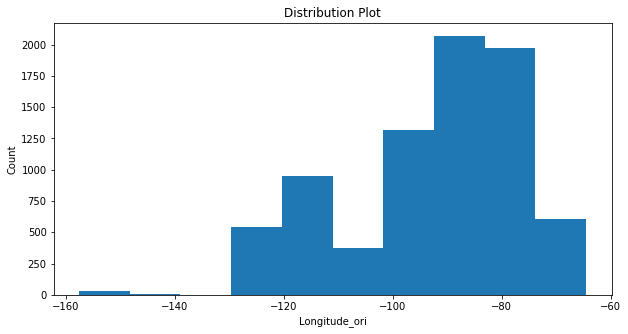

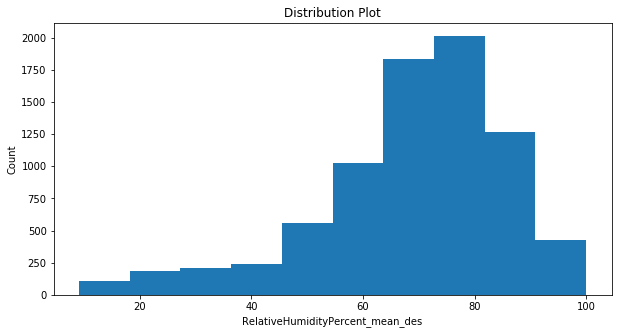

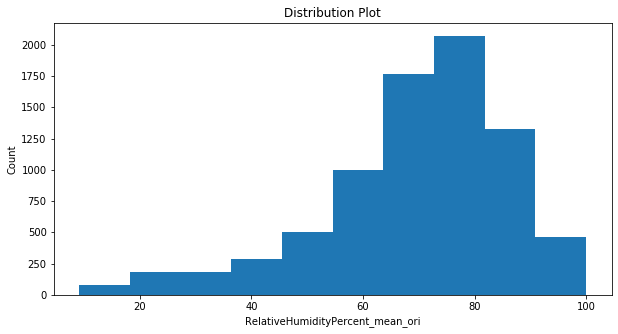

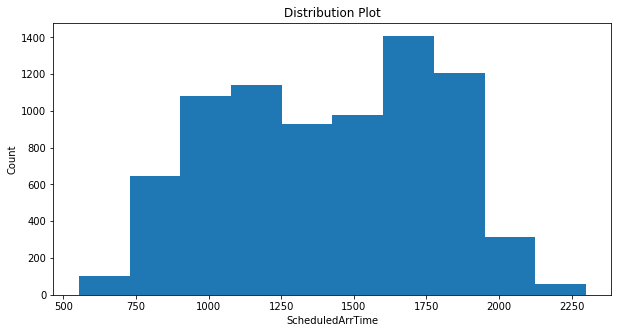

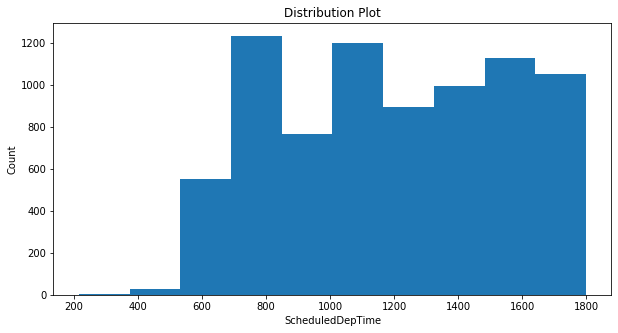

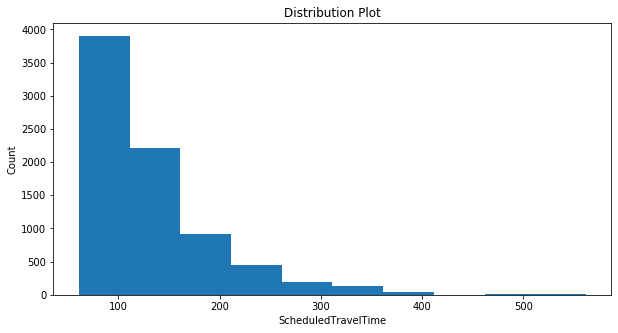

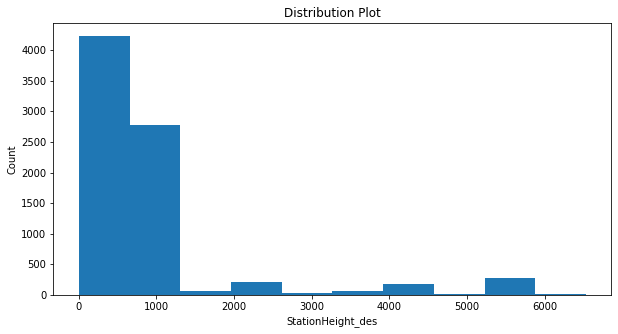

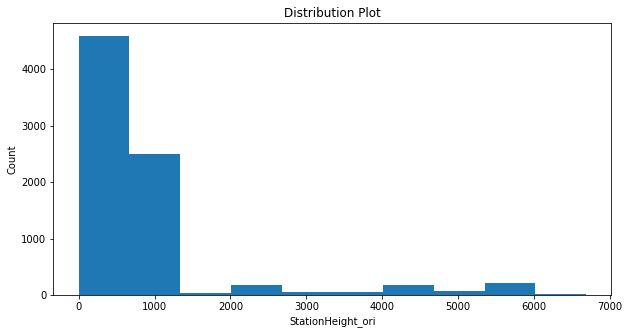

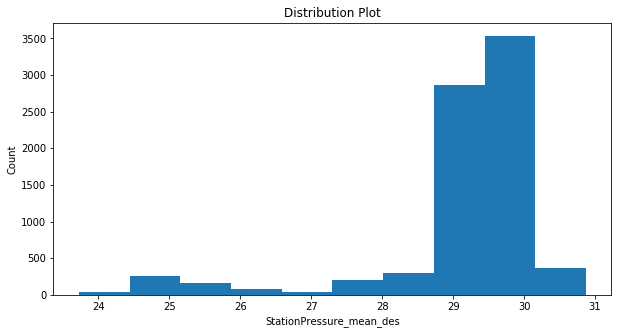

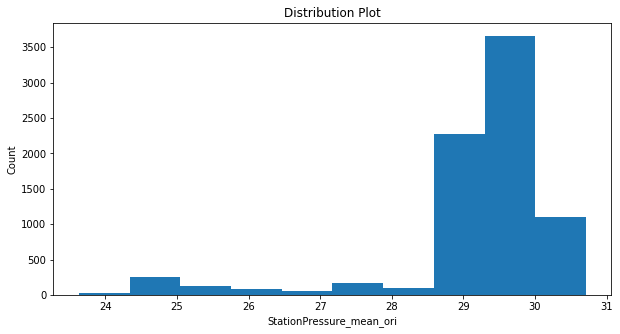

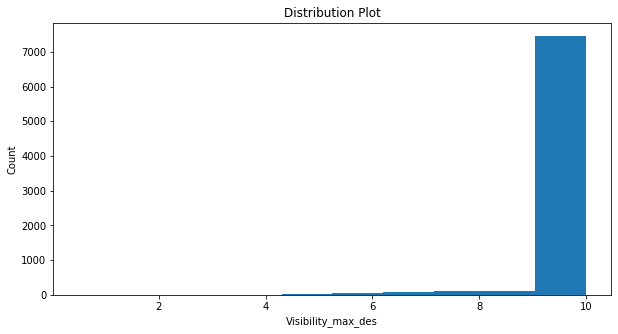

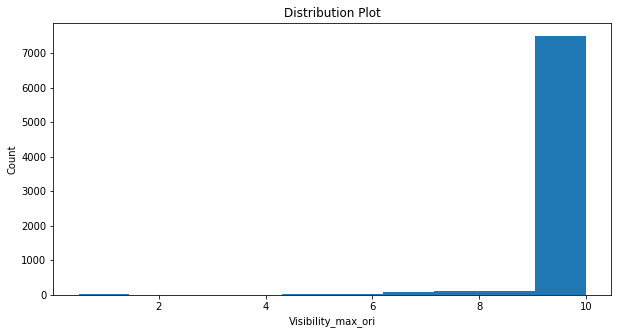

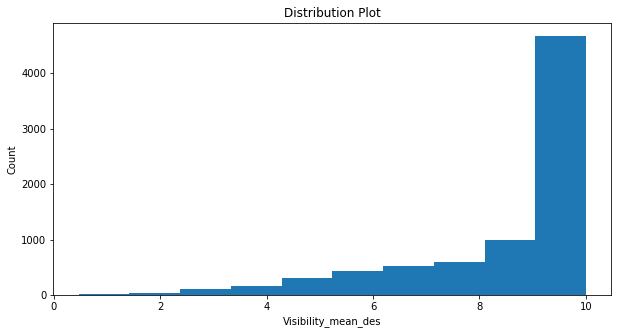

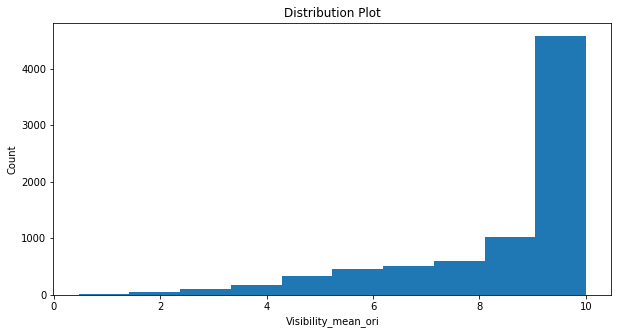

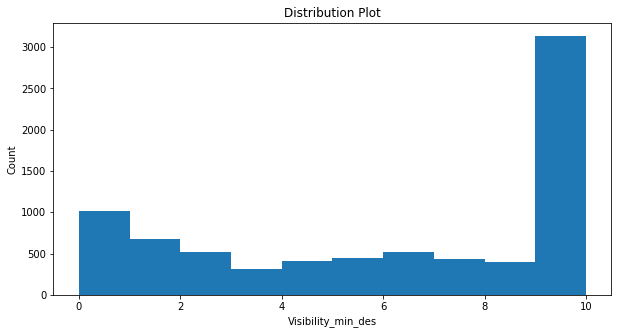

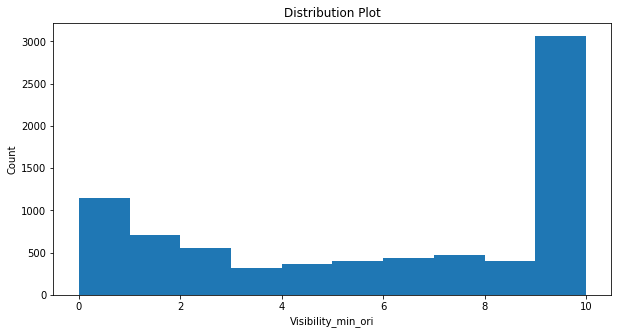

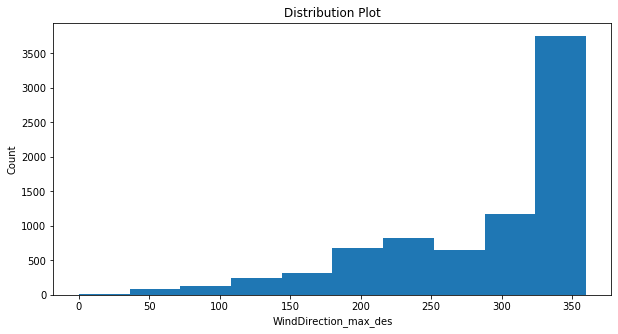

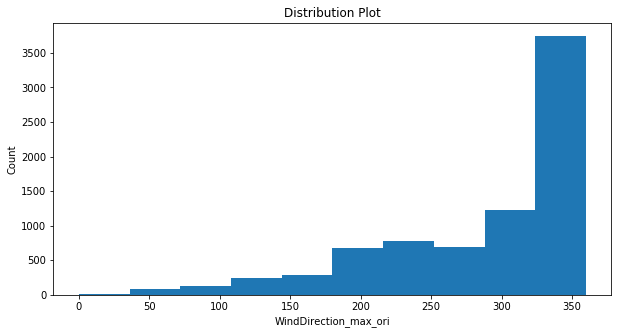

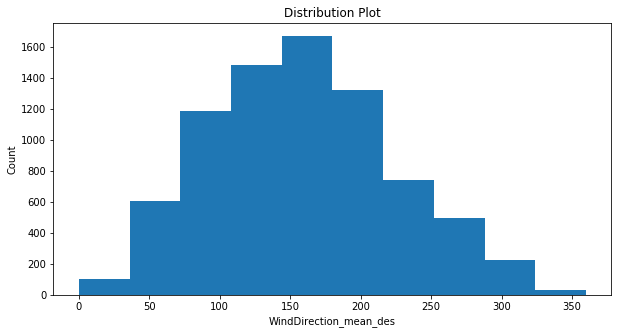

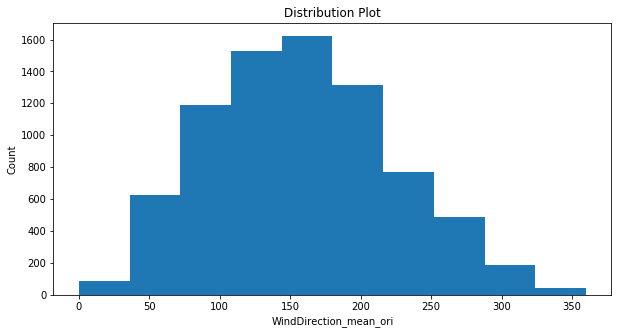

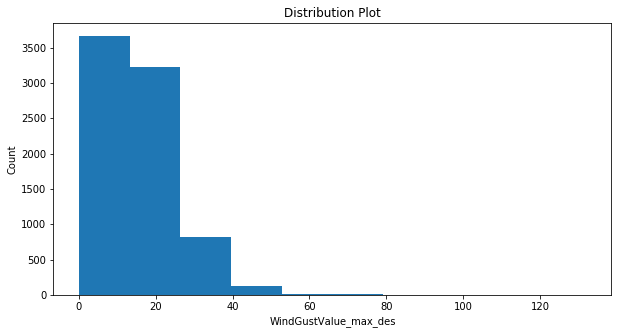

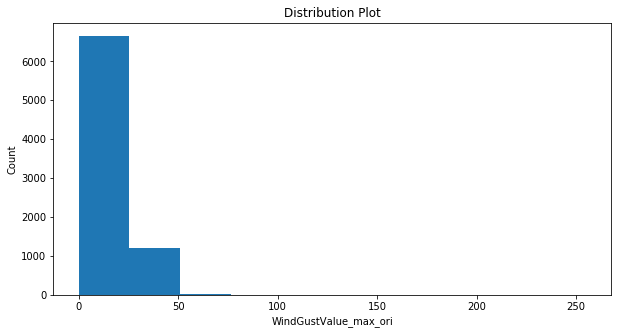

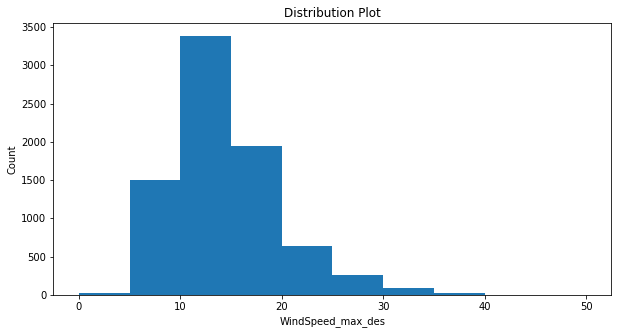

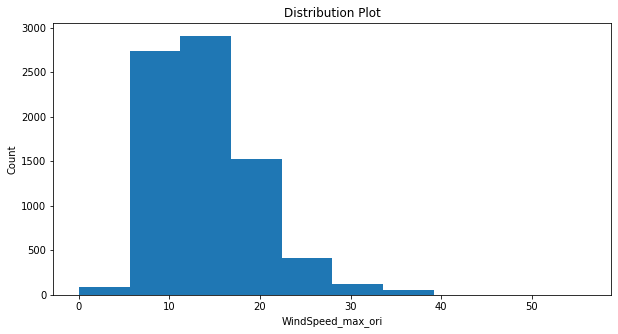

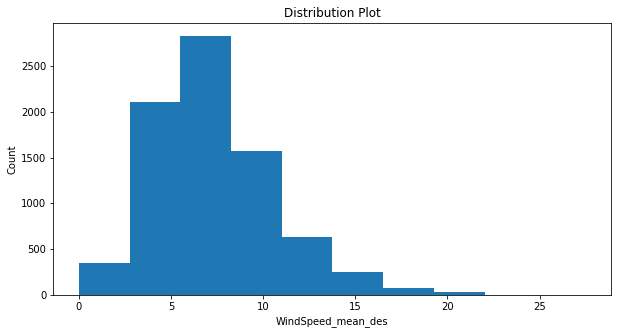

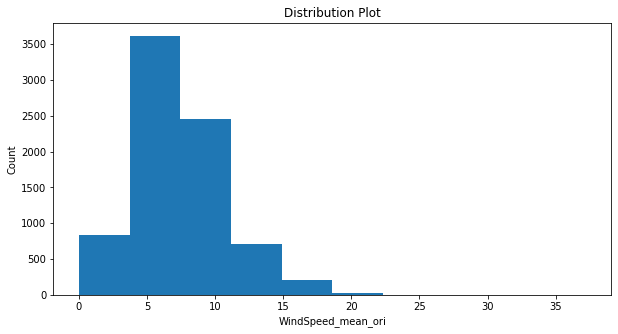

In [60]:
for col in num_cols:
    hist(train_data,col)

## __Observation__ 

After seeing all the histogram distributions of Numerical Columns:

1. Many columns are skewed to right or left like GroundHeight_des, BarometerHeight_des etc. Must do transfomations on these variables to remove skewness.

2. Some columns shows Zero variance distribution like HourlyPrecip_sum_des that can be removed after further analysis.


## Checking Outliers with Boxplot

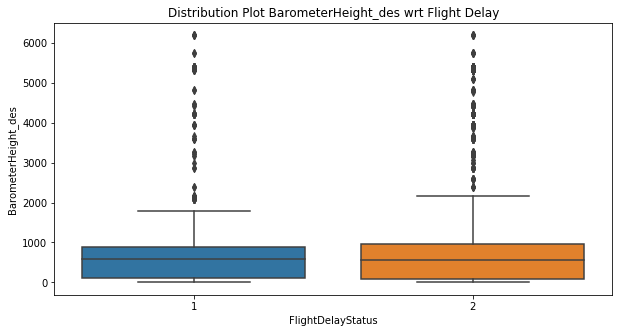

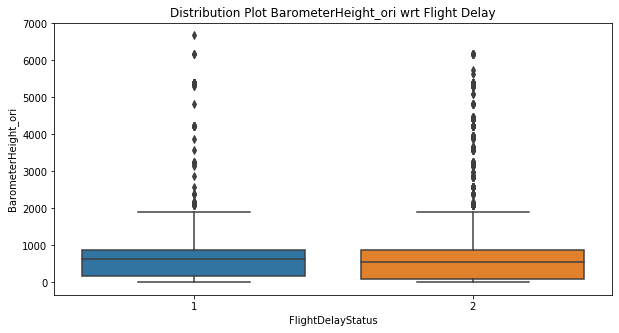

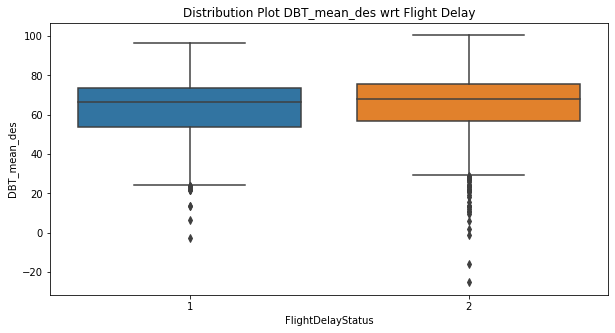

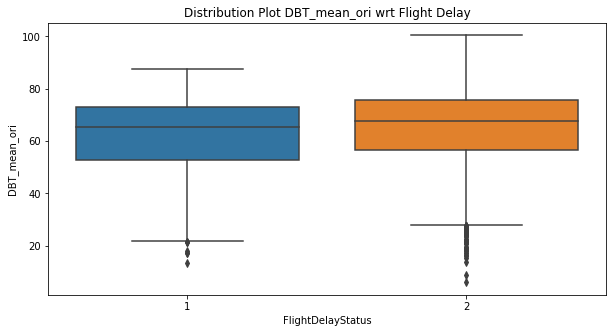

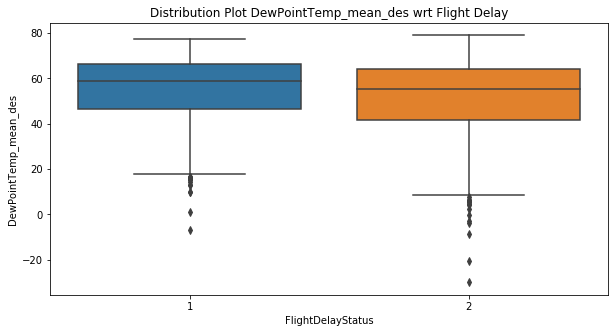

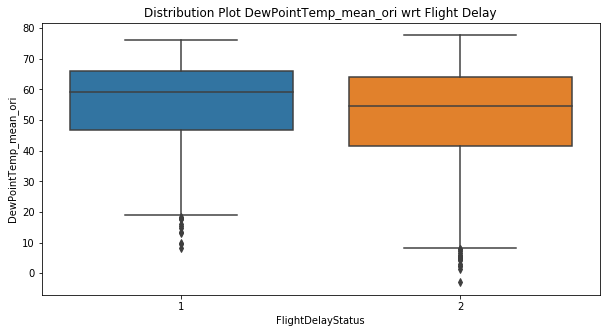

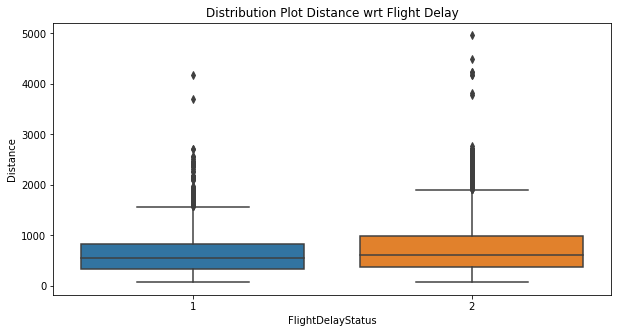

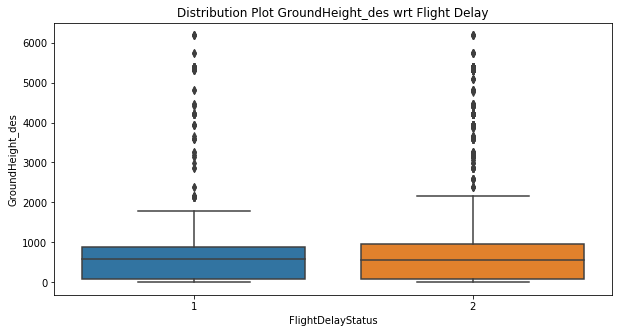

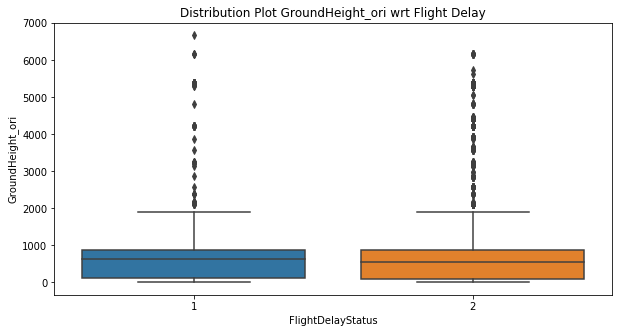

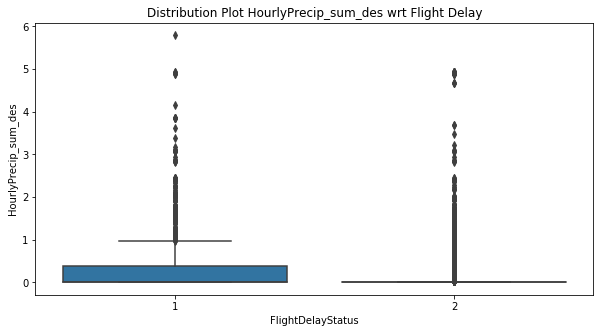

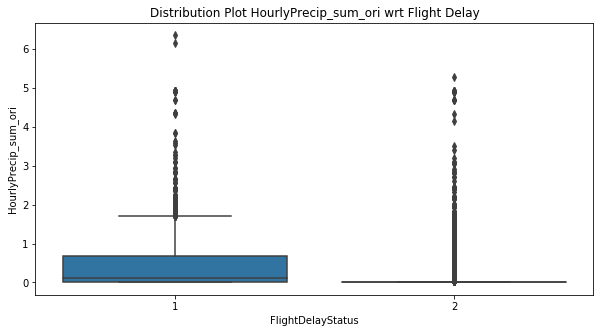

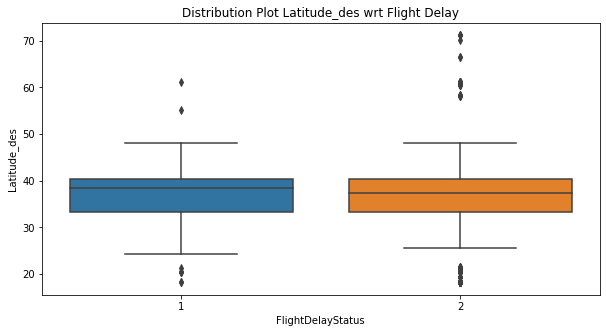

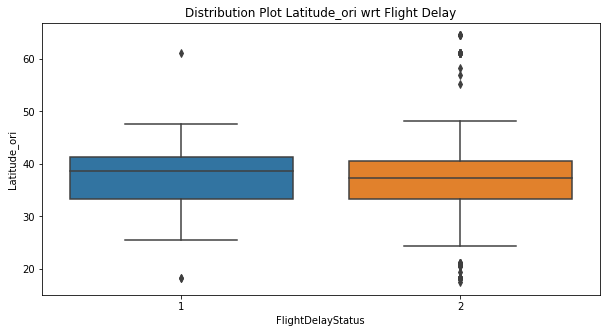

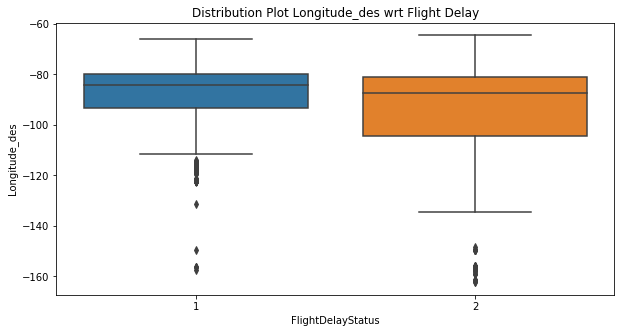

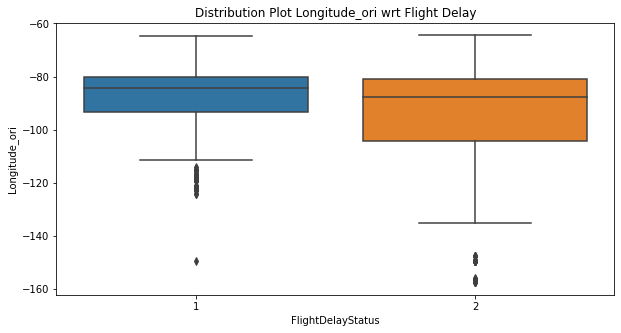

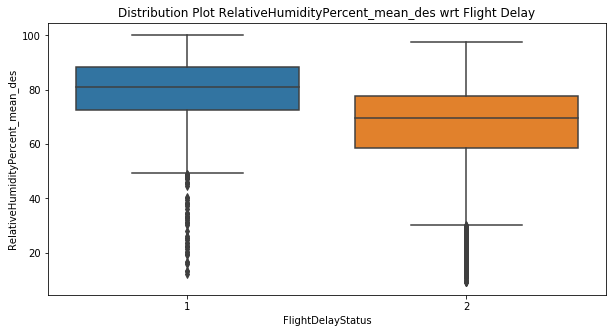

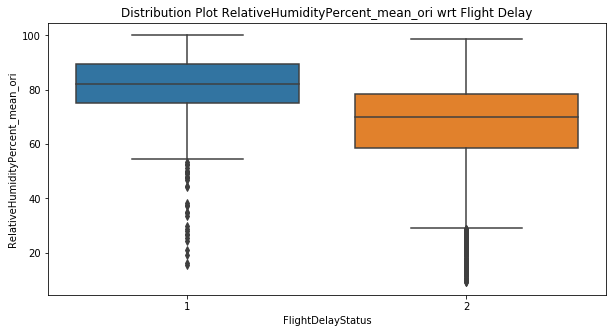

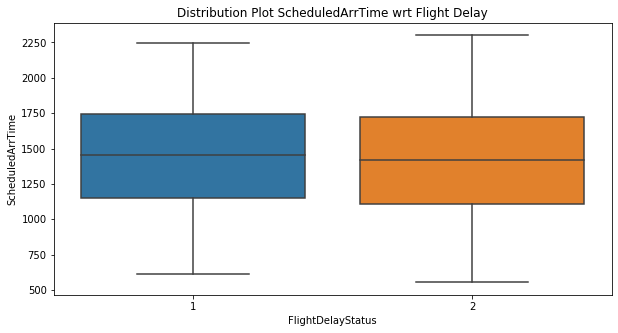

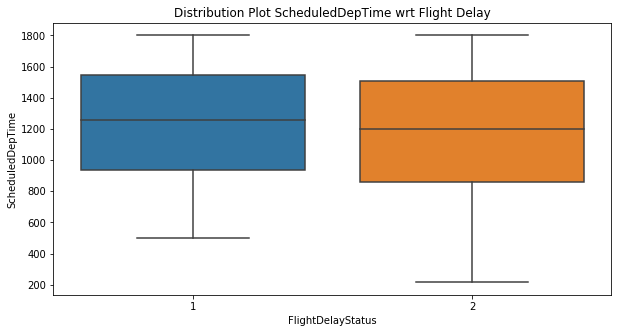

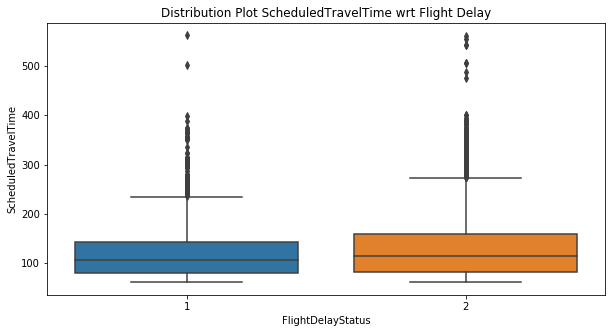

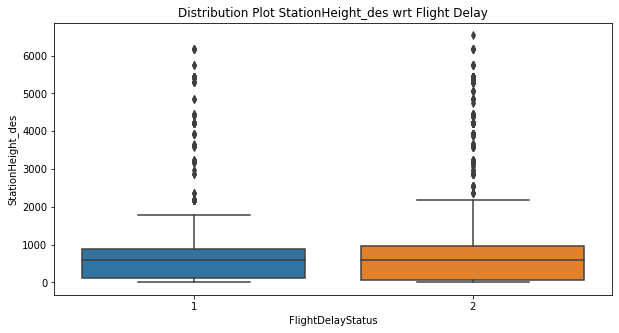

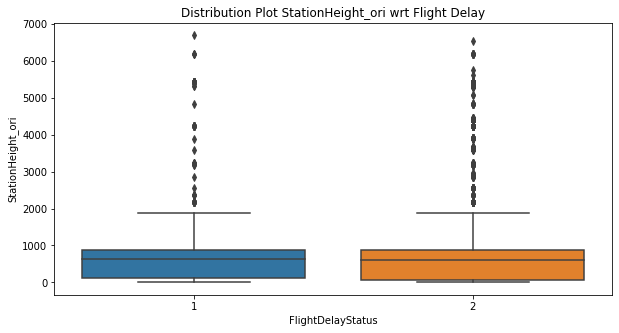

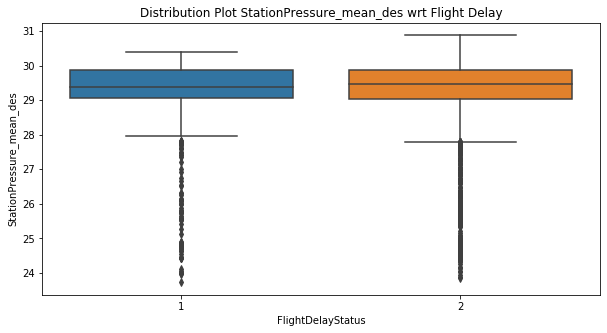

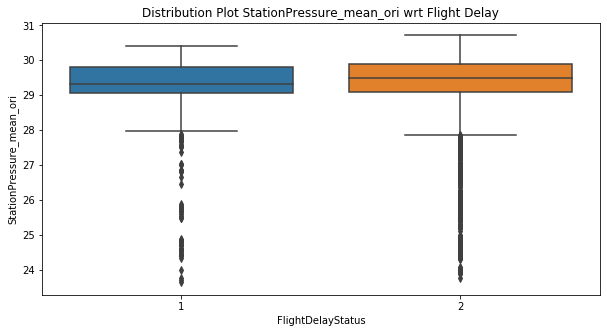

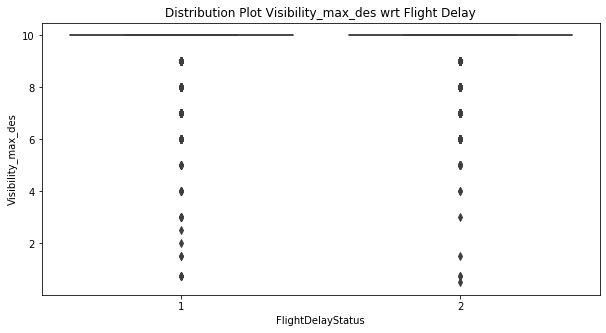

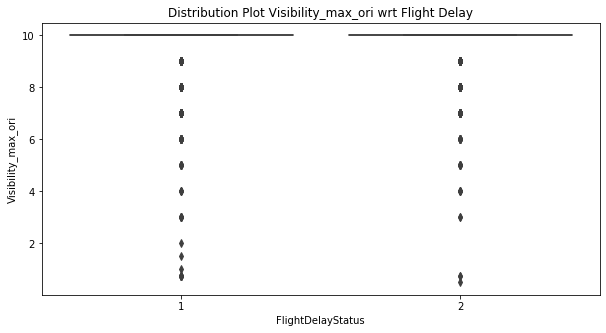

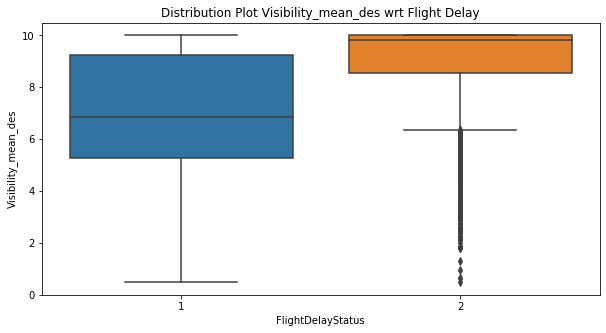

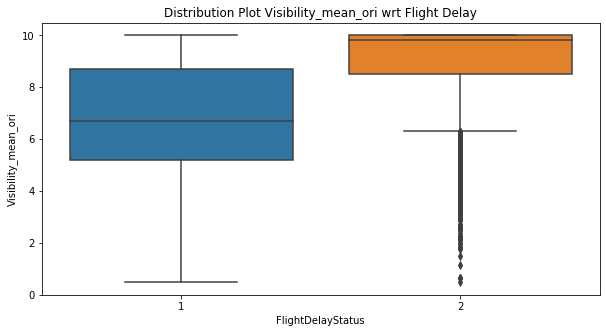

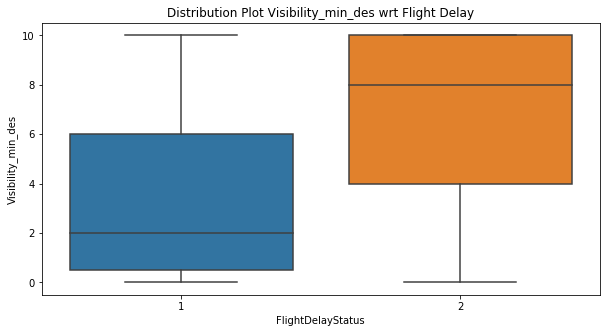

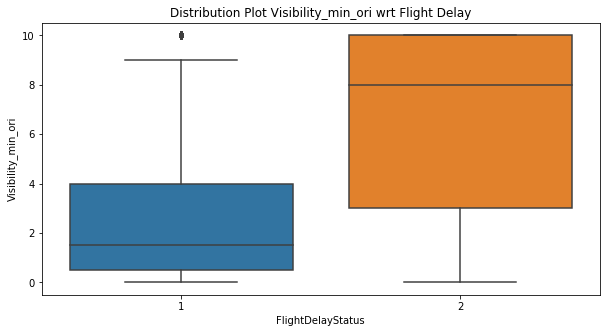

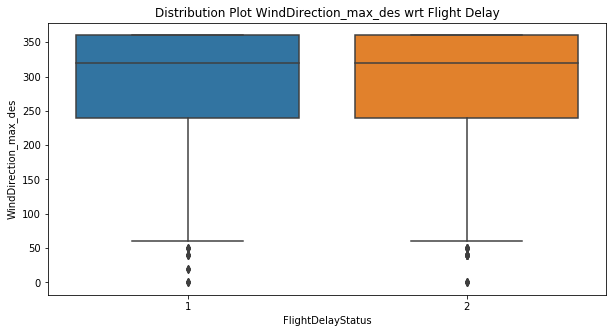

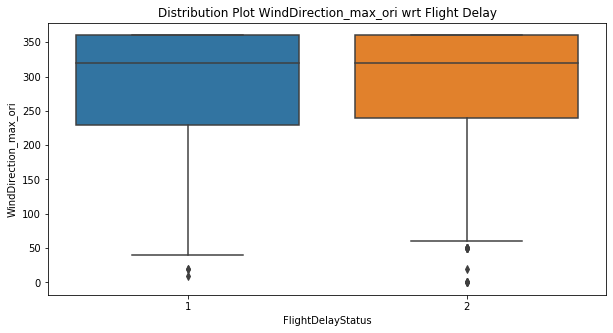

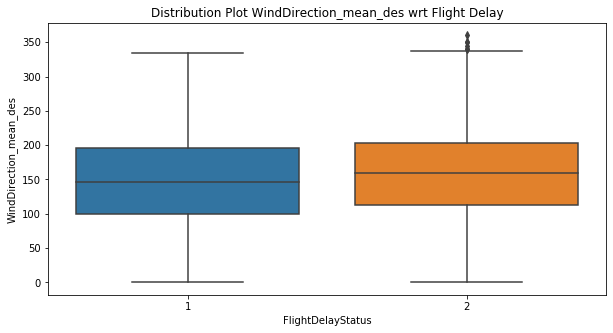

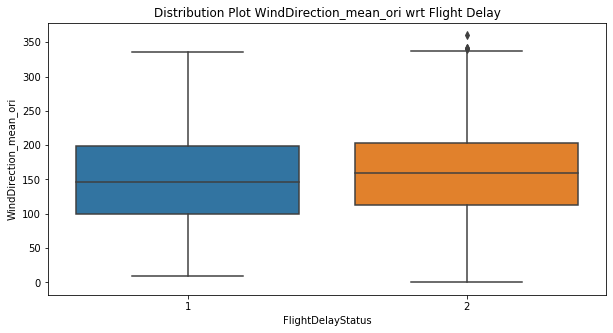

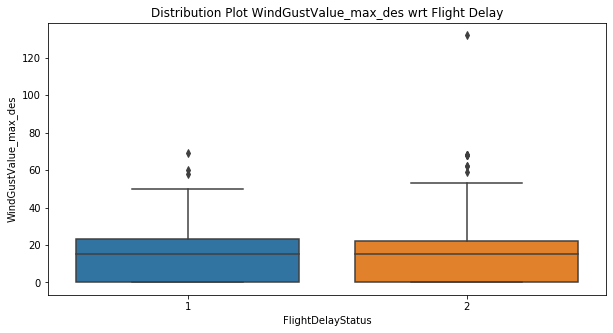

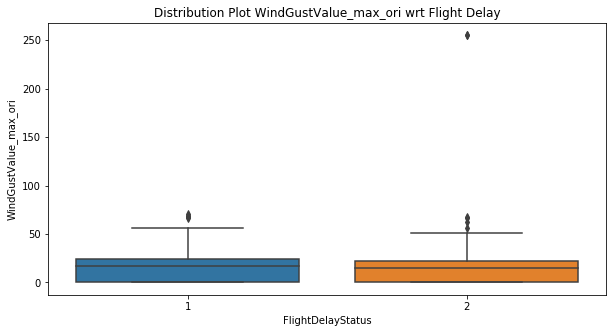

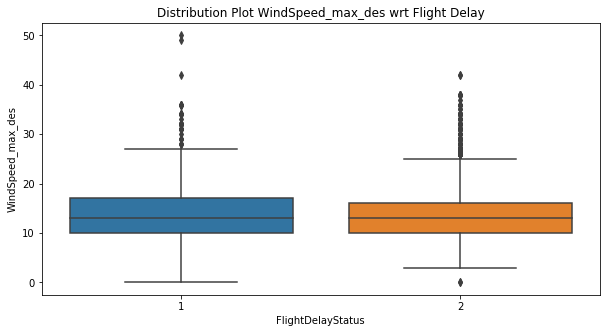

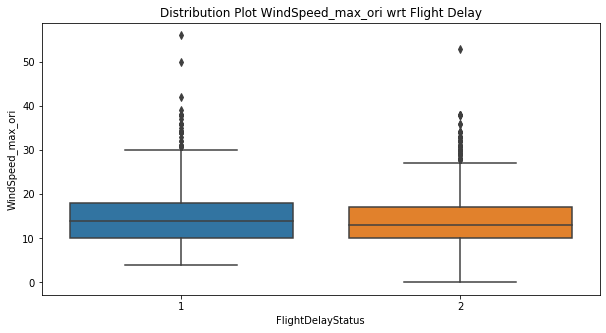

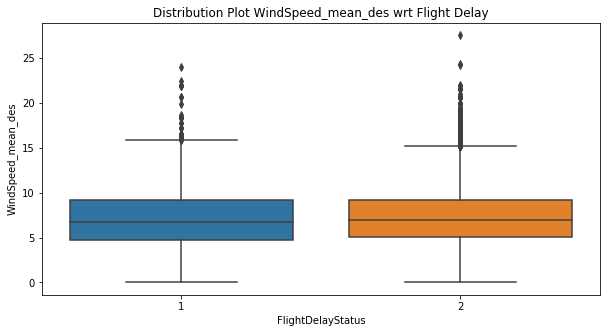

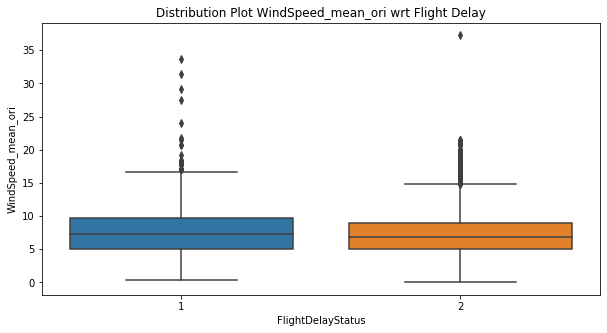

In [61]:
### Loop displaying Box Plot for all numerical columns wrt Flight Delay status 
    
for col in num_cols:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data = train_data, y = col, x = "FlightDelayStatus")
    plt.xlabel("FlightDelayStatus")
    plt.ylabel(col)
    plt.title("Distribution Plot" + " " + col + " " + "wrt Flight Delay")

    plt.show()
    
   

## __Observation__ 

After analysing all the boxplots of Numerical variables wrt FlightDelayStatus :

1. Many columns have outliers like ScheduledTraveltime, Station Height, Station pressure etc. Outliers must be removed and then analysed again.
2. Some column attributes show perfect distribution like ScheduledDepTime, ScheduledDepTime etc. 

# 7.1. Outliers

In [62]:
## Removing Outliers
for x in num_cols:
    median = train_data[x].median()
    std = train_data[x].std()
    outliers = (train_data[x] - median).abs() > 1.5*std
    train_data.loc[outliers,x] = np.nan
    train_data[x].fillna(median, inplace=True)

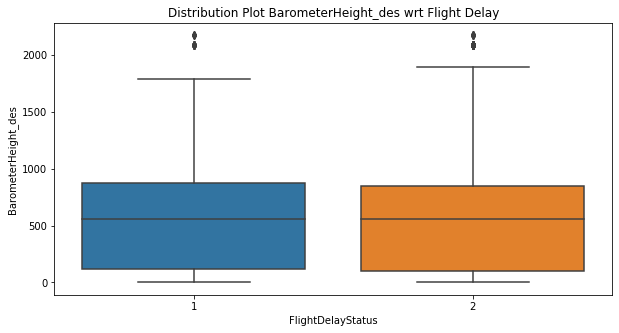

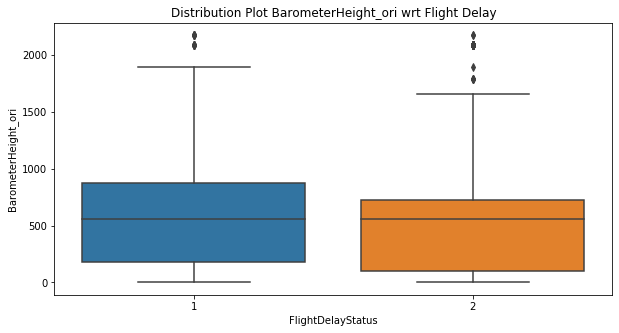

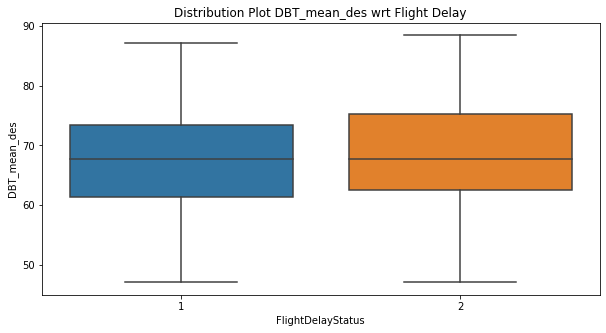

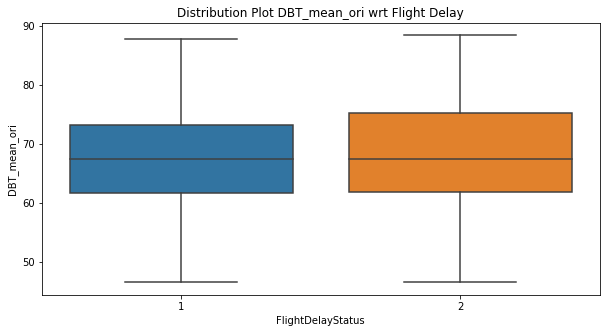

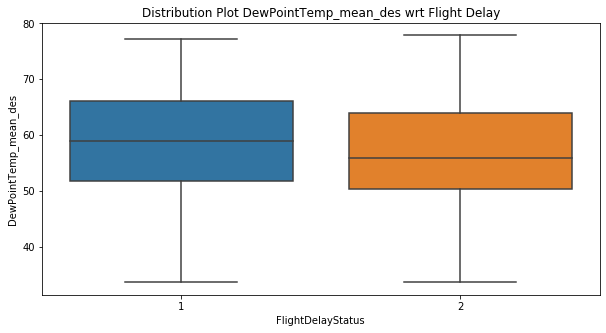

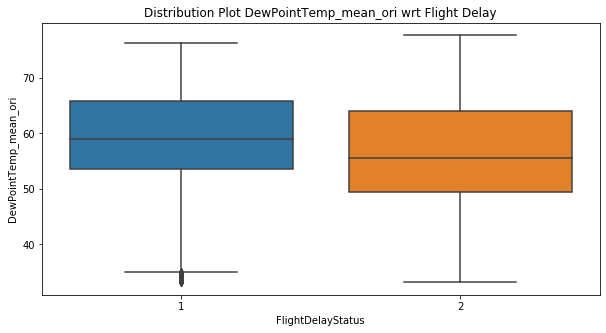

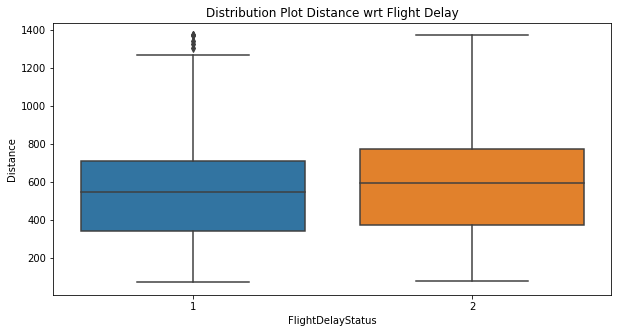

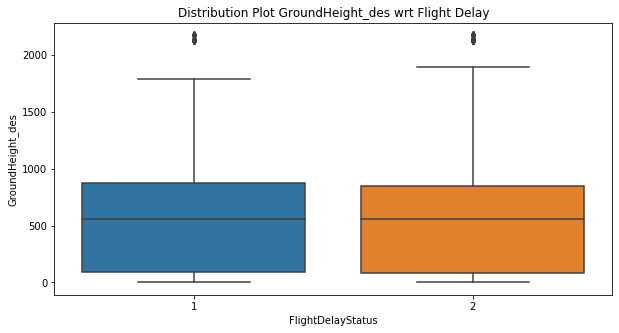

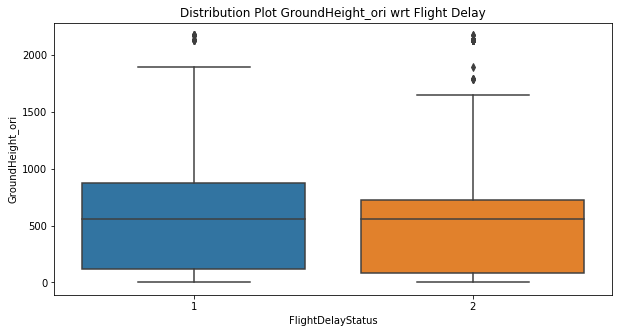

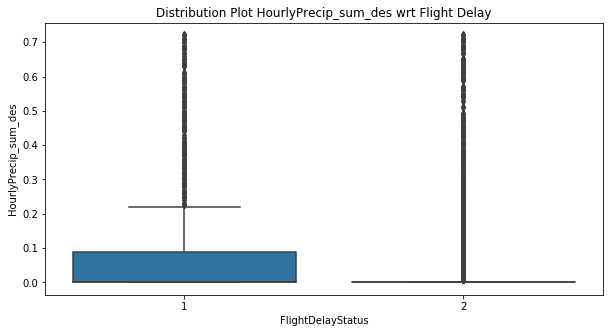

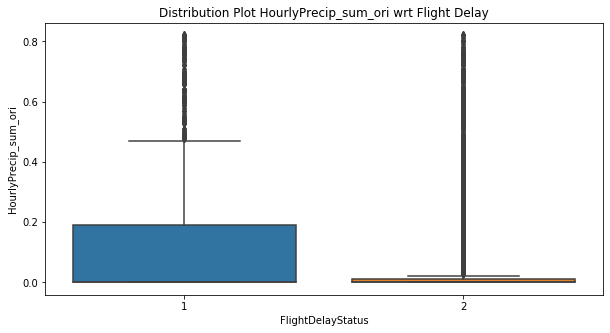

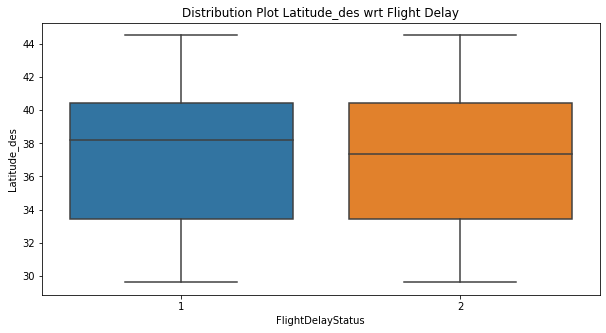

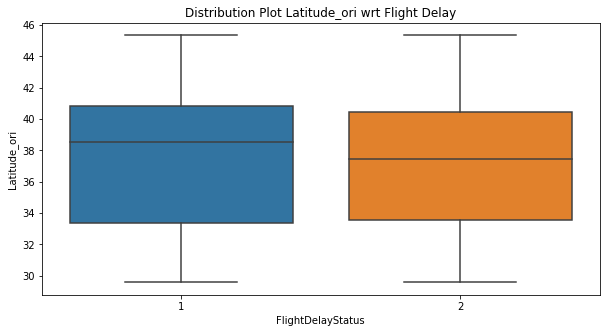

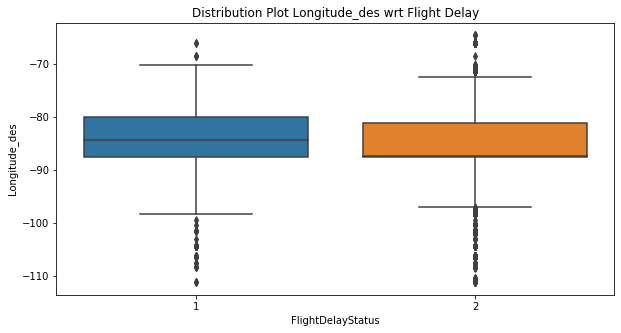

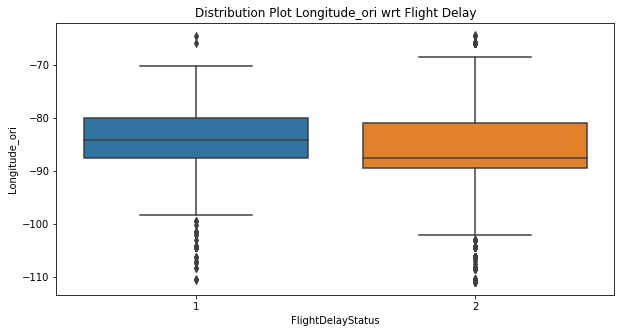

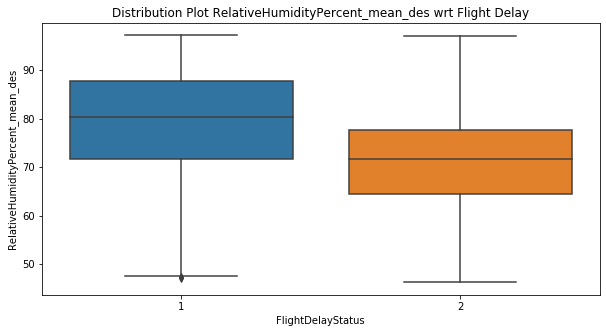

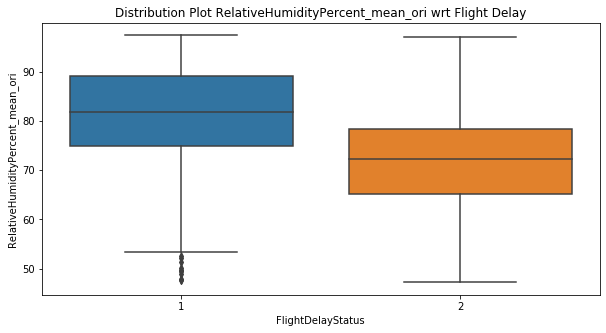

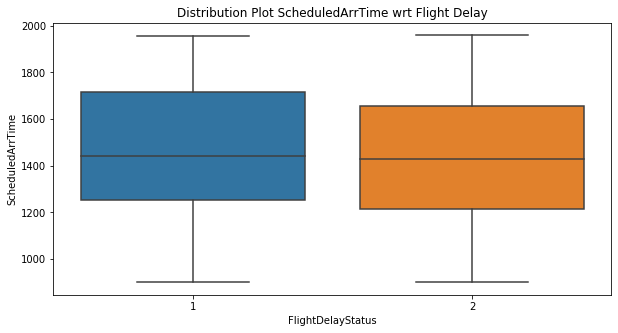

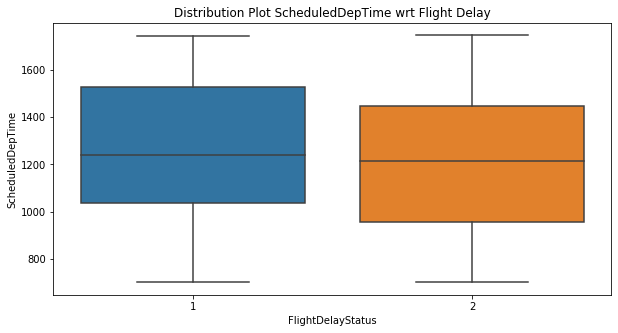

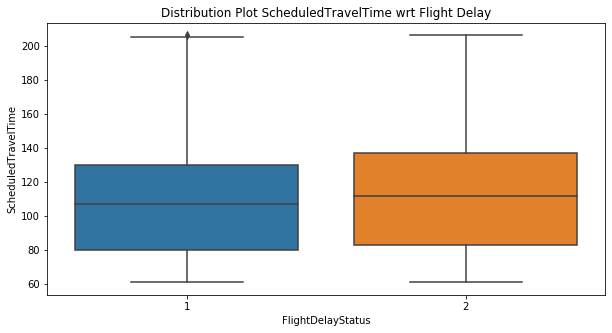

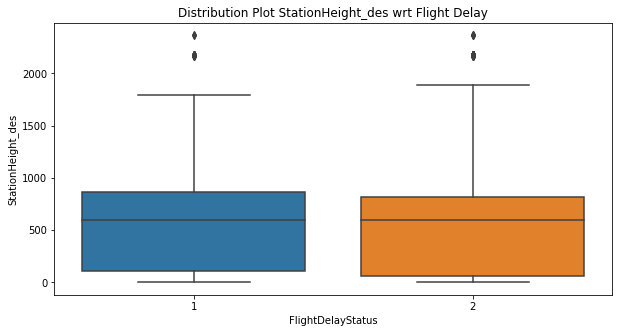

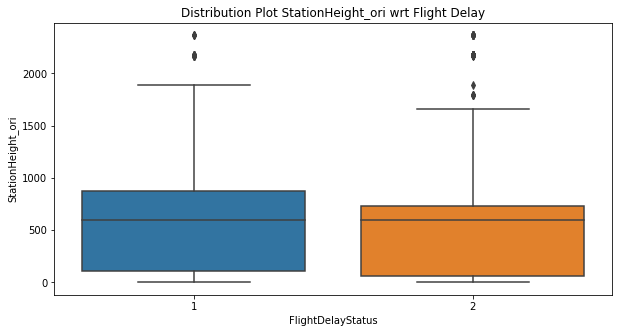

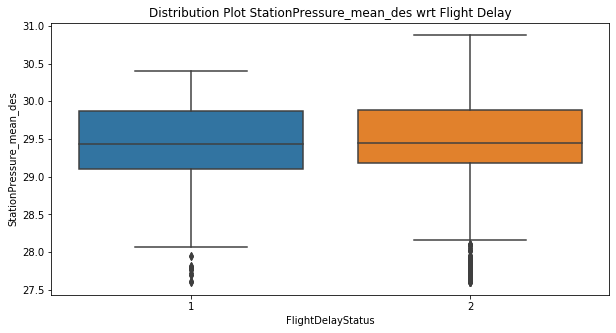

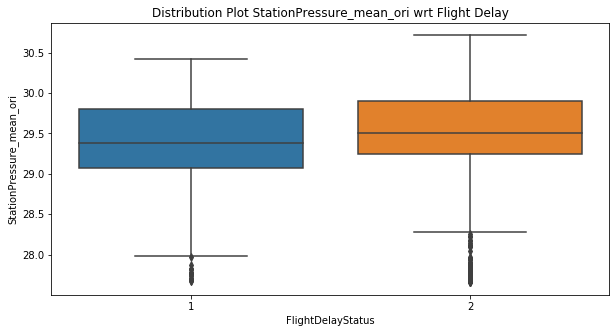

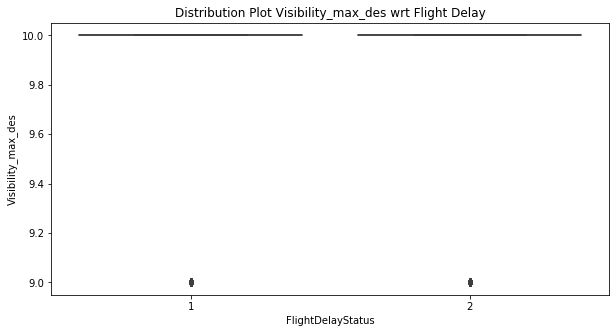

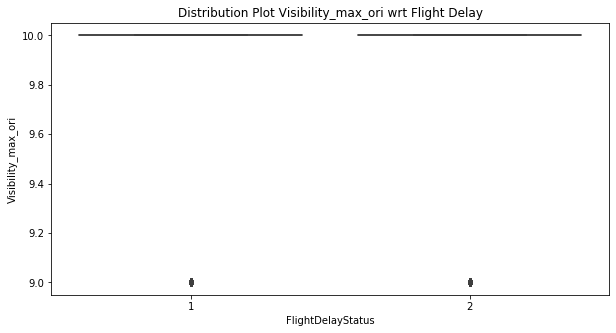

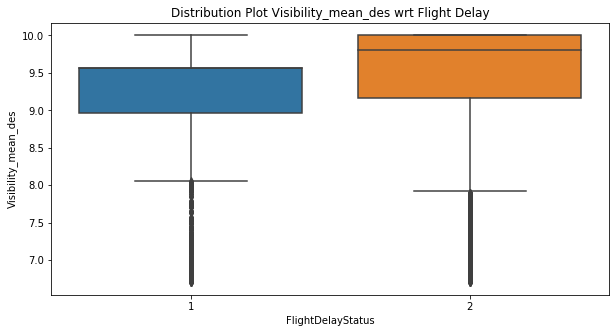

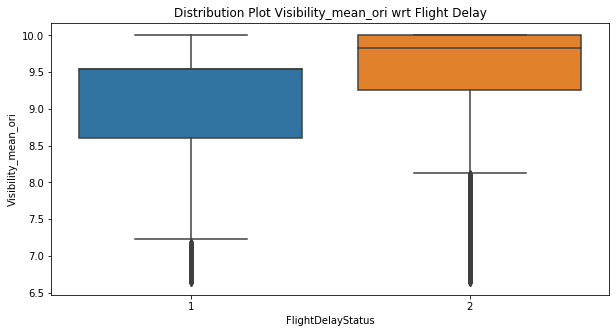

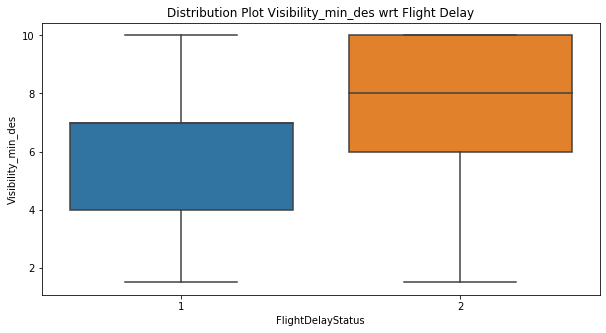

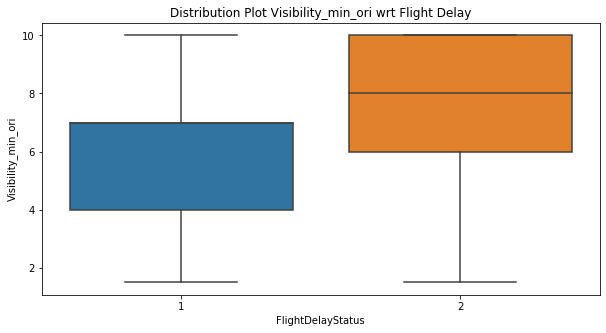

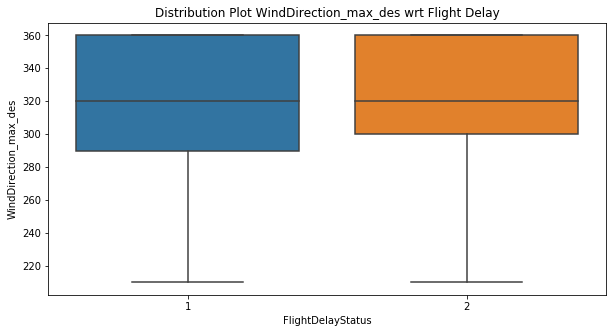

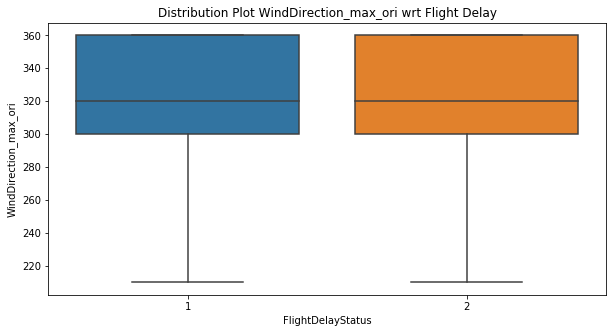

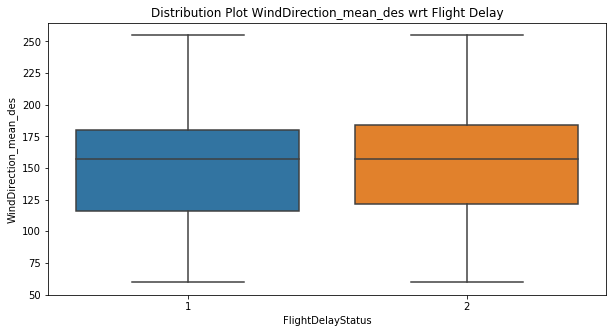

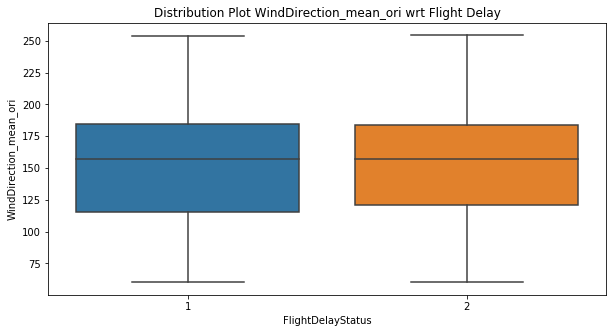

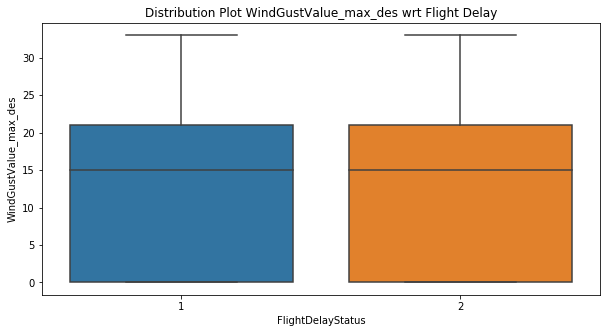

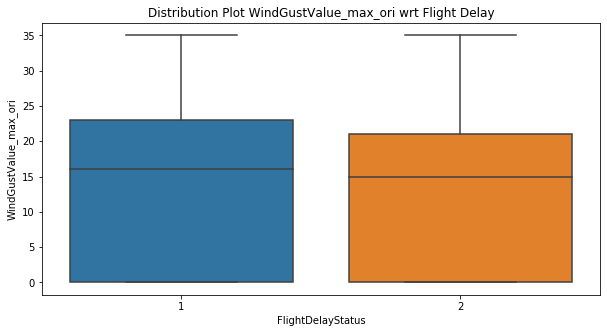

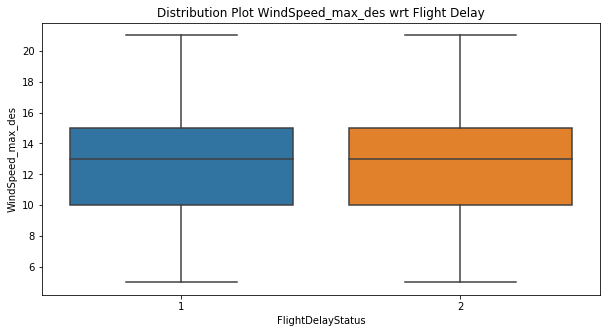

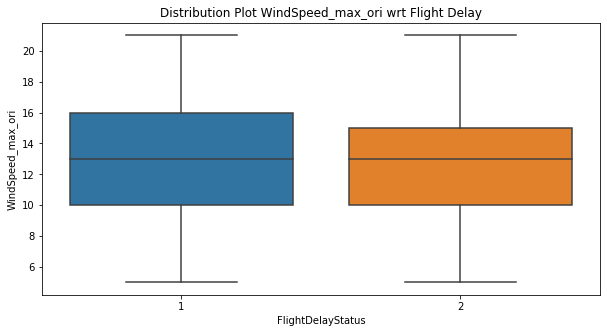

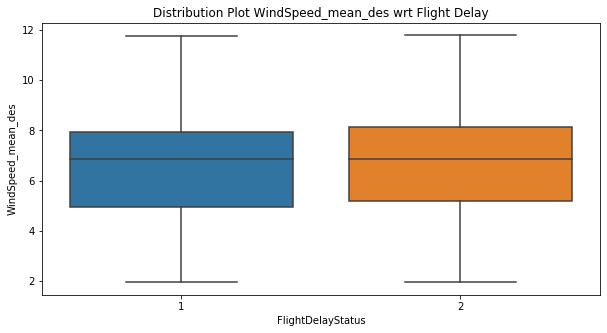

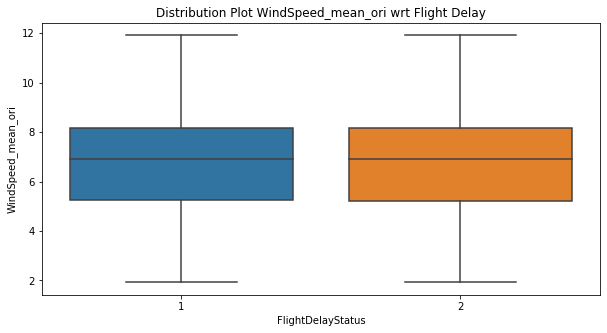

In [63]:
## After removing outliers again checking for distribution    
for col in num_cols:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data = train_data, y = col, x = "FlightDelayStatus")
    plt.xlabel("FlightDelayStatus")
    plt.ylabel(col)
    plt.title("Distribution Plot" + " " + col + " " + "wrt Flight Delay")

    plt.show()

#### _Analysing Variable for High cardinality after removing outliers_

In [64]:
train_data["Visibility_max_des"].value_counts()     #Checking for value counts of unique levels

10.0    7745
9.0      116
Name: Visibility_max_des, dtype: int64

In [65]:
train_data["Visibility_max_ori"].value_counts()     #Checking for value counts of unique levels

10.0    7757
9.0      104
Name: Visibility_max_ori, dtype: int64

__Dropping High Cardinality Column__

In [66]:
## Dropping Columns of High Cardinal Variable

train_data.drop(["Visibility_max_des","Visibility_max_ori"], axis = 1,inplace =True)
test_data.drop(["Visibility_max_des","Visibility_max_ori"], axis = 1,inplace =True)

## Analysing Skewness of Variables

In [67]:
num = train_data.select_dtypes(["int64","float64"])

### Skewness Value with Distplots

ScheduledDepTime
-0.014715022137446838


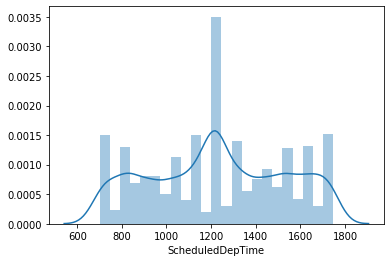

ScheduledArrTime
-0.08483817657905289


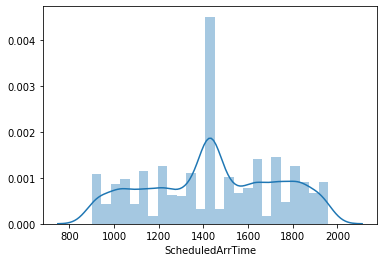

ScheduledTravelTime
0.6321754818349129


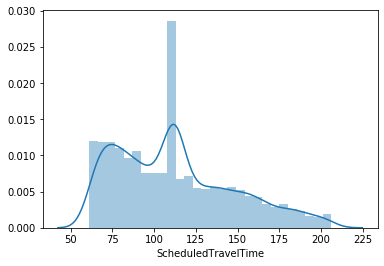

Distance
0.6216617826112862


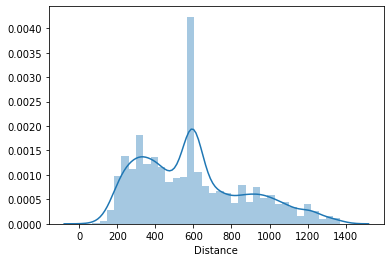

HourlyPrecip_sum_ori
2.9481875381249423


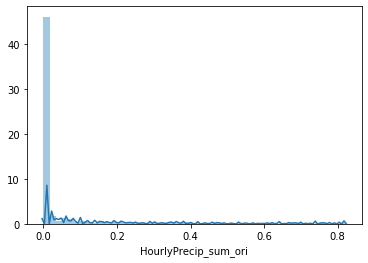

Visibility_min_ori
-0.6155206102301989


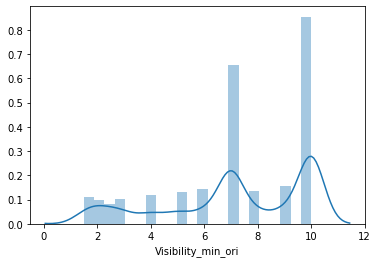

Visibility_mean_ori
-1.533139842668925


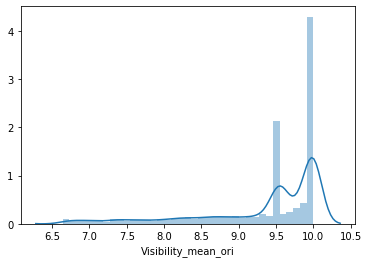

DBT_mean_ori
-0.32386407058238575


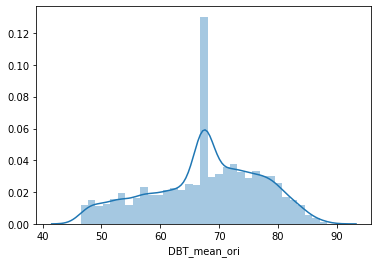

DewPointTemp_mean_ori
-0.31764658988115224


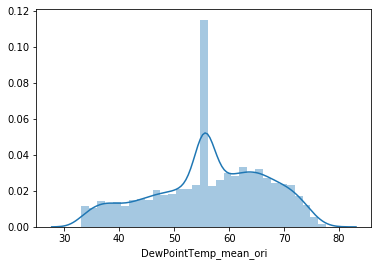

RelativeHumidityPercent_mean_ori
-0.1661543564556459


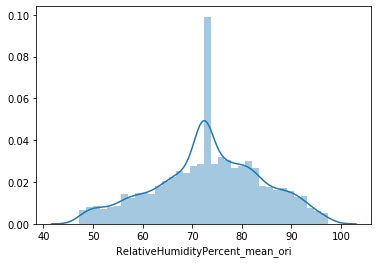

WindSpeed_max_ori
0.1923637818091447


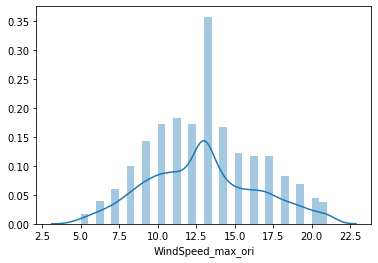

WindSpeed_mean_ori
0.13273033336397336


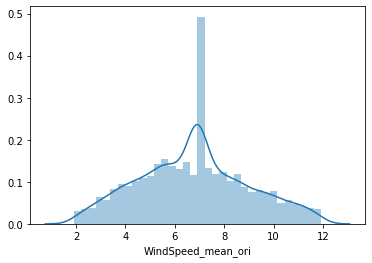

WindDirection_mean_ori
0.026846853039050843


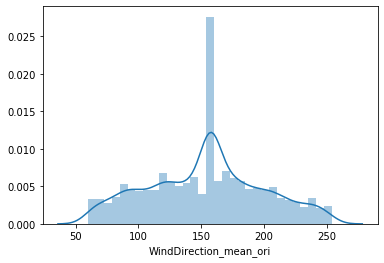

WindDirection_max_ori
-0.9749904778449292


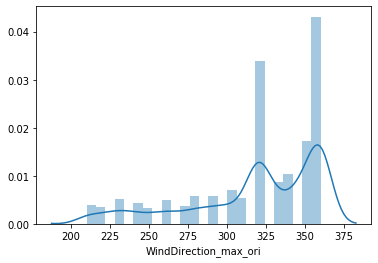

WindGustValue_max_ori
0.16467108308171602


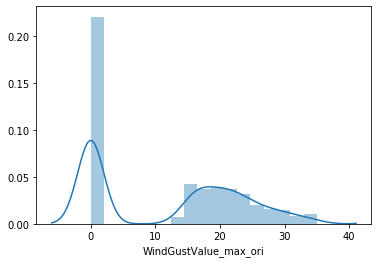

StationPressure_mean_ori
-0.6366708196188169


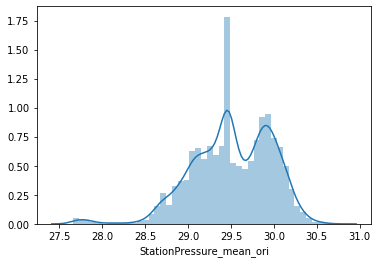

GroundHeight_ori
1.023684654244586


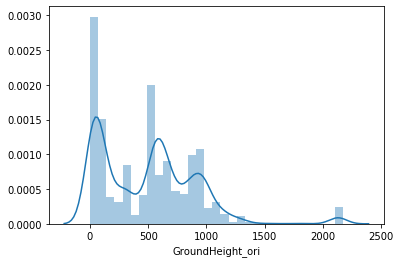

StationHeight_ori
1.077612069178874


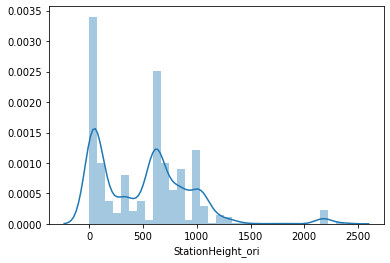

BarometerHeight_ori
1.0035656209496937


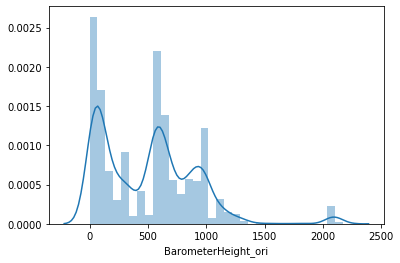

Latitude_ori
-0.17638471926463475


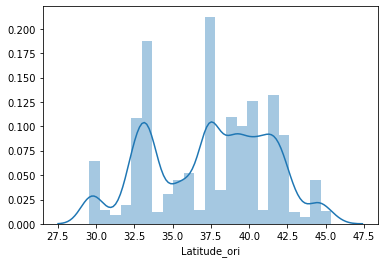

Longitude_ori
-0.34254048426751016


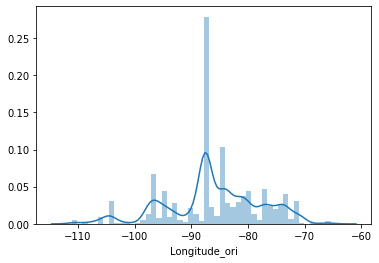

HourlyPrecip_sum_des
3.1783593680284037


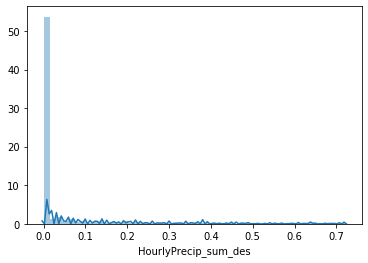

Visibility_min_des
-0.5958604920320167


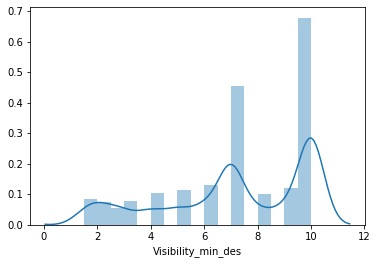

Visibility_mean_des
-1.5784531762813854


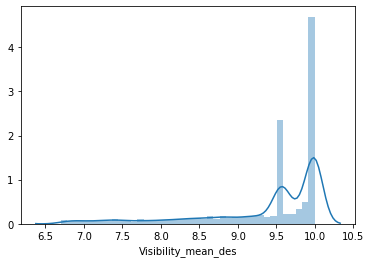

DBT_mean_des
-0.3072857196688878


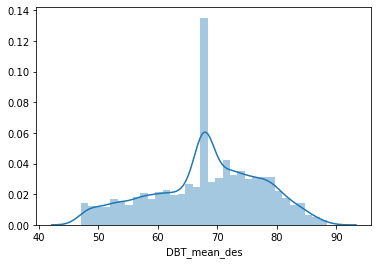

DewPointTemp_mean_des
-0.3466963719810289


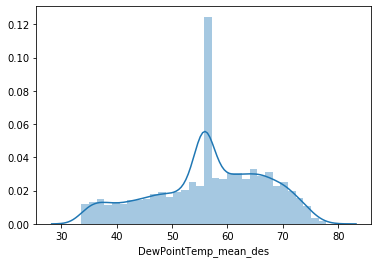

RelativeHumidityPercent_mean_des
-0.14923612626166896


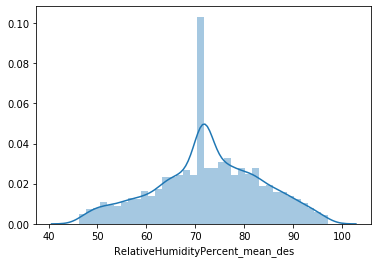

WindSpeed_max_des
0.19785125439549198


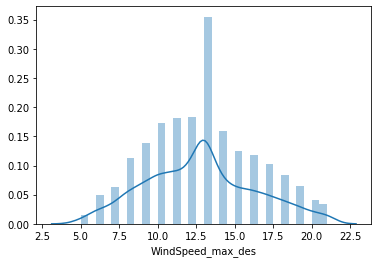

WindSpeed_mean_des
0.15212517822404523


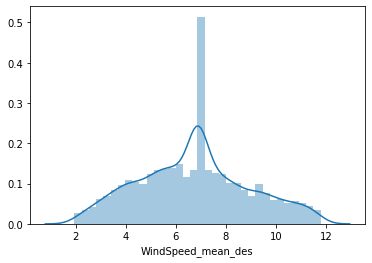

WindDirection_mean_des
0.010395536249234838


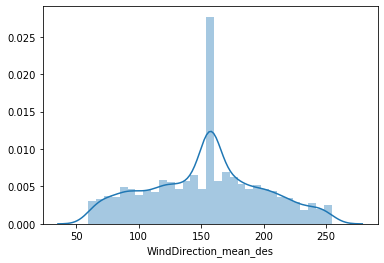

WindDirection_max_des
-0.9659884672493395


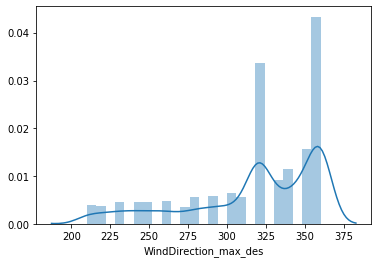

WindGustValue_max_des
0.18384535559627735


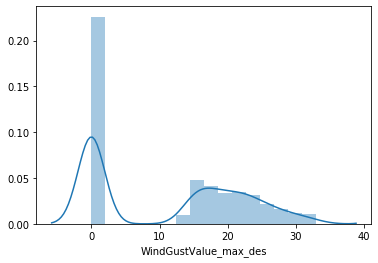

StationPressure_mean_des
-0.8460339417767202


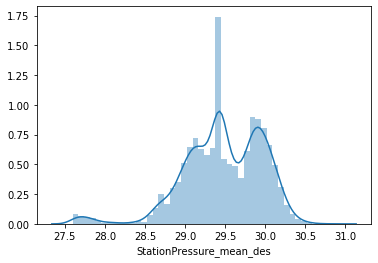

GroundHeight_des
1.11761803666533


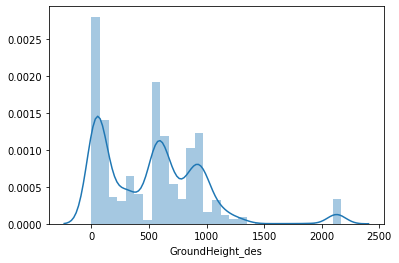

StationHeight_des
1.1010111278191794


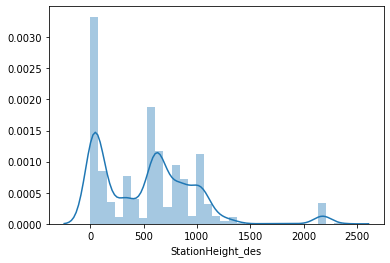

BarometerHeight_des
1.0901412740353487


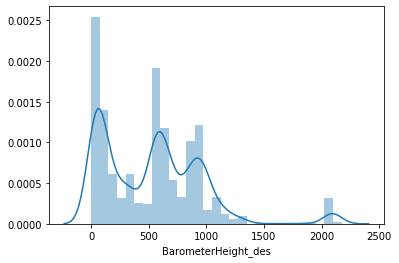

Latitude_des
-0.1877314549260634


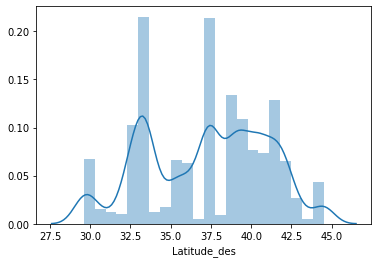

Longitude_des
-0.3610324143323405


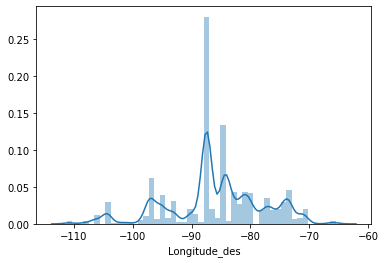

In [73]:
for col in num:
    print(col)
    print(skew(num[col]))
    
    plt.figure()
    sns.distplot(num[col])
    plt.show()

# 8. Binning on Train and Test Data

#### Analysing Wind Direction_Max for binning

In [69]:
data = getProbOfDelay('WindDirection_max_ori', 'FlightDelayStatus', train_data)

   WindDirection_max_ori   1    2  TotalCount  ProbOfDelay
0                  210.0  33  151         184     0.179348
1                  220.0  27  136         163     0.165644
2                  230.0  59  189         248     0.237903
3                  240.0  37  166         203     0.182266
4                  250.0  30  130         160     0.187500


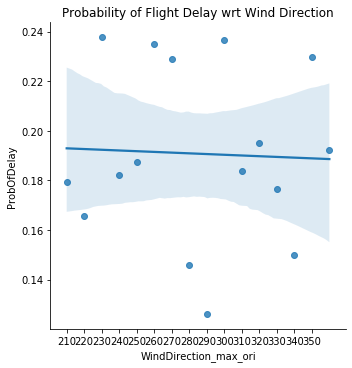

In [70]:
sns.lmplot(data = data, x = 'WindDirection_max_ori', y = 'ProbOfDelay', fit_reg = True)
plt.xticks(np.arange(np.min(train_data['WindDirection_max_ori']), np.max(train_data['WindDirection_max_ori']), 10))
plt.title('Probability of Flight Delay wrt Wind Direction')
plt.show()

__Observation__ 
 - Correlation wrt probability of Flight Delay with certain direction

In [71]:
print(np.min(train_data['WindDirection_max_ori']))
print(np.max(train_data['WindDirection_max_ori']))

210.0
360.0


In [74]:
data = getProbOfDelay('WindDirection_max_des', 'FlightDelayStatus', train_data)

   WindDirection_max_des   1    2  TotalCount  ProbOfDelay
0                  210.0  38  150         188     0.202128
1                  220.0  33  143         176     0.187500
2                  230.0  47  169         216     0.217593
3                  240.0  39  182         221     0.176471
4                  250.0  39  173         212     0.183962


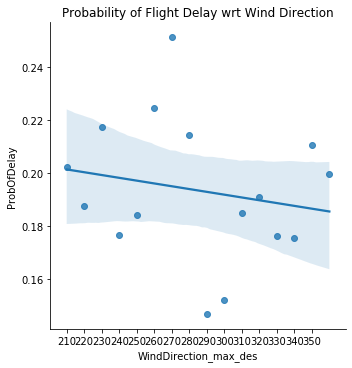

In [75]:
## Distribution wrt Probability of Flight Delay

sns.lmplot(data = data, x = 'WindDirection_max_des', y = 'ProbOfDelay', fit_reg = True)
plt.xticks(np.arange(np.min(train_data['WindDirection_max_des']), np.max(train_data['WindDirection_max_des']), 10))
plt.title('Probability of Flight Delay wrt Wind Direction')
plt.show()

#### Feature Engg on WindDirection_max Variable

In [76]:
#Binning Function of Scheduled_time :

def get_direction_of_wind(x):
    if (x >= 0) and (x<25):
        return 'E'
    elif (x >= 25) and (x < 65 ):
        return 'NE'
    elif (x >= 65) and (x < 125):
        return'N'
    elif (x >= 125) and (x < 165) :
        return 'NW'
    elif (x >= 165) and (x < 225):
        return'W'
    elif (x >= 225) and (x < 265) :
        return 'SW'
    elif (x >= 265) and (x < 325):
        return'S'
    elif (x >= 325) and (x < 365) :
        return 'SE'
    elif (x >= 365) and (x <= 360):
        return'S'

In [77]:
## Calling function for train and test data on both SchArrTime and SchDepTime :
train_data['WindDirection_max_ori_Binned'] = train_data['WindDirection_max_ori'].apply(get_direction_of_wind)
train_data['WindDirection_max_des_Binned'] = train_data['WindDirection_max_des'].apply(get_direction_of_wind)

test_data['WindDirection_max_ori_Binned'] = test_data['WindDirection_max_ori'].apply(get_direction_of_wind)
test_data['WindDirection_max_des_Binned'] = test_data['WindDirection_max_des'].apply(get_direction_of_wind)

In [78]:
train_data=train_data.drop(["WindDirection_max_ori","WindDirection_max_des"], axis = 1)
test_data=test_data.drop(["WindDirection_max_ori","WindDirection_max_des"], axis = 1)

In [79]:
train_data['WindDirection_max_ori_Binned'] = train_data['WindDirection_max_ori_Binned'].astype('category')
train_data['WindDirection_max_des_Binned'] = train_data['WindDirection_max_des_Binned'].astype('category')
test_data['WindDirection_max_ori_Binned'] = test_data["WindDirection_max_ori_Binned"].astype("category")
test_data['WindDirection_max_des_Binned'] = test_data["WindDirection_max_des_Binned"].astype("category")

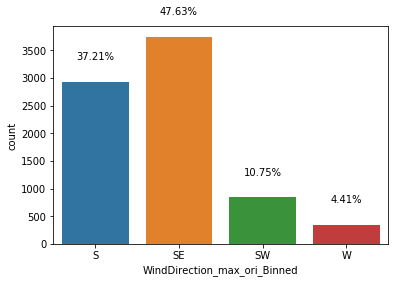

In [80]:
barplot("WindDirection_max_ori_Binned",train_data)

__Observation__ 
Origin Location is mostly influenced by SE wind direction

Need to do Transformation (i.e., Log,sqrt etc.) for removing skewness

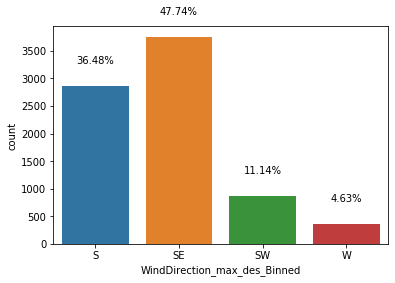

In [81]:
barplot("WindDirection_max_des_Binned",train_data)

__Observation__ 
Destination Location is mostly influenced by SE and S wind direction, least by East direction

Need to do Transformation (i.e., Log,sqrt etc.) for removing skewness

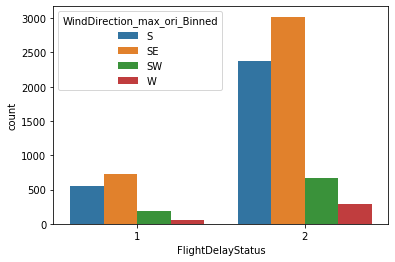

In [82]:
# Visualizing the importance of variable wrt FlightDelayStatus
train_data[train_data.FlightDelayStatus == 1].WindDirection_max_ori_Binned.value_counts(normalize=True)*100
sns.countplot(x='FlightDelayStatus', hue = "WindDirection_max_ori_Binned", data=train_data) 
plt.show()

#### _Analysing Time Variable for Binning_

In [84]:
#Binning Function of Scheduled_time :

def get_session_of_day(x):
    if (x >= 215) and (x<500):
        return 'Night'
    elif (x >= 500) and (x < 1100 ):
        return 'Morning'
    elif (x >= 1100) and (x < 1430):
        return'Noon'
    elif (x >= 1430) and (x <= 1800) :
        return 'Evening'
    elif (x >= 1800) and (x < 2400):
        return'Night'

In [85]:
## Calling function for train and test data on both SchArrTime and SchDepTime :
train_data['ScheduledArrTime_Binned'] = train_data['ScheduledArrTime'].apply(get_session_of_day)
train_data['ScheduledDepTime_Binned'] = train_data['ScheduledDepTime'].apply(get_session_of_day)

test_data['ScheduledArrTime_Binned'] = test_data['ScheduledArrTime'].apply(get_session_of_day)
test_data['ScheduledDepTime_Binned'] = test_data['ScheduledDepTime'].apply(get_session_of_day)

In [86]:
train_data=train_data.drop(["ScheduledArrTime","ScheduledDepTime"],axis=1)
test_data=test_data.drop(["ScheduledArrTime","ScheduledDepTime"],axis=1)

In [87]:
train_data['ScheduledArrTime_Binned'] = train_data['ScheduledArrTime_Binned'].astype('category')
train_data['ScheduledDepTime_Binned'] = train_data['ScheduledDepTime_Binned'].astype('category')
test_data['ScheduledArrTime_Binned'] = test_data["ScheduledArrTime_Binned"].astype("category")
test_data['ScheduledDepTime_Binned'] = test_data["ScheduledDepTime_Binned"].astype("category")

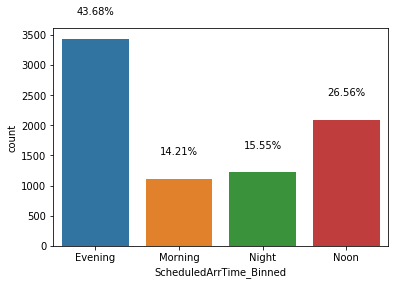

In [88]:
barplot("ScheduledArrTime_Binned",train_data)

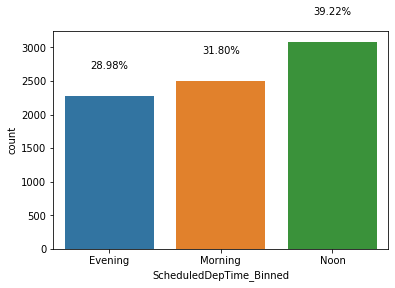

In [89]:
barplot("ScheduledDepTime_Binned",train_data)

## Analysing Target Attribute

In [90]:
print("The count distribution target classes is as below:")

train_data["FlightDelayStatus"].value_counts()

The count distribution target classes is as below:


2    6342
1    1519
Name: FlightDelayStatus, dtype: int64

In [91]:
print("The percentage distribution target classes is as below:")

train_data["FlightDelayStatus"].value_counts(1)        

The percentage distribution target classes is as below:


2    0.806768
1    0.193232
Name: FlightDelayStatus, dtype: float64

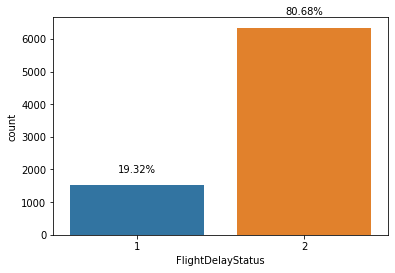

In [92]:
barplot("FlightDelayStatus",train_data)    #barplot for checking the distribution

__Observation__ 

- Flight Delay Status has class imbalance of ratio 80:20 (approx)

# 10. Split the data into train and validation

In [93]:
y = train_data["FlightDelayStatus"]                     #Getting target attribute
X = train_data.drop('FlightDelayStatus', axis=1)        #Getting Independent Variables
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 123, stratify = y)

In [94]:
## Getting the shape of train and validation

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(5895, 47)
(1966, 47)
(5895,)
(1966,)


## Split the attributes into numerical and categorical types

In [95]:
num_attr=X_train.select_dtypes(['int64','float64']).columns   #Saving Numerical columns
num_attr

Index(['ScheduledTravelTime', 'Distance', 'HourlyPrecip_sum_ori',
       'Visibility_min_ori', 'Visibility_mean_ori', 'DBT_mean_ori',
       'DewPointTemp_mean_ori', 'RelativeHumidityPercent_mean_ori',
       'WindSpeed_max_ori', 'WindSpeed_mean_ori', 'WindDirection_mean_ori',
       'WindGustValue_max_ori', 'StationPressure_mean_ori', 'GroundHeight_ori',
       'StationHeight_ori', 'BarometerHeight_ori', 'Latitude_ori',
       'Longitude_ori', 'HourlyPrecip_sum_des', 'Visibility_min_des',
       'Visibility_mean_des', 'DBT_mean_des', 'DewPointTemp_mean_des',
       'RelativeHumidityPercent_mean_des', 'WindSpeed_max_des',
       'WindSpeed_mean_des', 'WindDirection_mean_des', 'WindGustValue_max_des',
       'StationPressure_mean_des', 'GroundHeight_des', 'StationHeight_des',
       'BarometerHeight_des', 'Latitude_des', 'Longitude_des'],
      dtype='object')

In [96]:
cat_attr = X_train.select_dtypes('category').columns     # Saving Categorical columns
cat_attr

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Destination',
       'WeatherStationID_ori', 'TimeZone_ori', 'WeatherStationID_des',
       'TimeZone_des', 'WindDirection_max_ori_Binned',
       'WindDirection_max_des_Binned', 'ScheduledArrTime_Binned',
       'ScheduledDepTime_Binned'],
      dtype='object')

# 11. Preparation for Model buillding

## Checking and Imputing Missing Values

In [97]:
print(X_train.isnull().sum())            #Checking null values

Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
WeatherStationID_ori                0
HourlyPrecip_sum_ori                0
Visibility_min_ori                  0
Visibility_mean_ori                 0
DBT_mean_ori                        0
DewPointTemp_mean_ori               0
RelativeHumidityPercent_mean_ori    0
WindSpeed_max_ori                   0
WindSpeed_mean_ori                  0
WindDirection_mean_ori              0
WindGustValue_max_ori               0
StationPressure_mean_ori            0
GroundHeight_ori                    0
StationHeight_ori                   0
BarometerHeight_ori                 0
Latitude_ori                        0
Longitude_ori                       0
TimeZone_ori                        0
WeatherStationID_des                0
HourlyPrecip

In [98]:
print(X_val.isnull().sum())

Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
WeatherStationID_ori                0
HourlyPrecip_sum_ori                0
Visibility_min_ori                  0
Visibility_mean_ori                 0
DBT_mean_ori                        0
DewPointTemp_mean_ori               0
RelativeHumidityPercent_mean_ori    0
WindSpeed_max_ori                   0
WindSpeed_mean_ori                  0
WindDirection_mean_ori              0
WindGustValue_max_ori               0
StationPressure_mean_ori            0
GroundHeight_ori                    0
StationHeight_ori                   0
BarometerHeight_ori                 0
Latitude_ori                        0
Longitude_ori                       0
TimeZone_ori                        0
WeatherStationID_des                0
HourlyPrecip

In [105]:
#Imputing Null values in Numerical column

#imputer = SimpleImputer(strategy='median')      
#imputer = imputer.fit(X_train[num_attr])

#X_train[num_attr] = imputer.transform(X_train[num_attr])
#X_val[num_attr] = imputer.transform(X_val[num_attr])

In [106]:
# Imputing Null values in Categorical columns

#imputer = SimpleImputer(strategy='most_frequent')   
#imputer = imputer.fit(X_train[cat_attr])

#X_train[cat_attr] = imputer.transform(X_train[cat_attr])

In [99]:
print(test_data.isnull().sum())    #Checking null values in test_data

Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
WeatherStationID_ori                0
HourlyPrecip_sum_ori                0
Visibility_min_ori                  0
Visibility_mean_ori                 0
DBT_mean_ori                        1
DewPointTemp_mean_ori               2
RelativeHumidityPercent_mean_ori    3
WindSpeed_max_ori                   0
WindSpeed_mean_ori                  0
WindDirection_mean_ori              0
WindGustValue_max_ori               0
StationPressure_mean_ori            1
GroundHeight_ori                    0
StationHeight_ori                   0
BarometerHeight_ori                 0
Latitude_ori                        0
Longitude_ori                       0
TimeZone_ori                        0
WeatherStationID_des                0
HourlyPrecip

In [100]:
## Imputing missing values in test data (Numerical Column)
imputer = SimpleImputer(strategy='median') 
imputer = imputer.fit(test_data[num_attr])
test_data[num_attr] = imputer.transform(test_data[num_attr])

In [101]:
## Imputing missing values in test data (Categorical Column)
imputer = SimpleImputer(strategy='most_frequent')   
imputer = imputer.fit(test_data[cat_attr])
test_data[cat_attr] = imputer.transform(test_data[cat_attr])

In [102]:
print(test_data.isnull().sum())

Month                               0
DayofMonth                          0
DayOfWeek                           0
ScheduledTravelTime                 0
Origin                              0
Destination                         0
Distance                            0
WeatherStationID_ori                0
HourlyPrecip_sum_ori                0
Visibility_min_ori                  0
Visibility_mean_ori                 0
DBT_mean_ori                        0
DewPointTemp_mean_ori               0
RelativeHumidityPercent_mean_ori    0
WindSpeed_max_ori                   0
WindSpeed_mean_ori                  0
WindDirection_mean_ori              0
WindGustValue_max_ori               0
StationPressure_mean_ori            0
GroundHeight_ori                    0
StationHeight_ori                   0
BarometerHeight_ori                 0
Latitude_ori                        0
Longitude_ori                       0
TimeZone_ori                        0
WeatherStationID_des                0
HourlyPrecip

__Observation:__

 - All null values present in train and test are imputed.

# Multicollinearity 

#### Standardizing the numerical variables

In [103]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

#Standardising train num columns to remove multicollinearity
X_train_num = pd.DataFrame(scaler.transform(X_train[num_attr]), columns=num_attr)
#X_val_num = pd.DataFrame(scaler.transform(X_val[num_attr]), columns=num_attr)

#scaler.fit(test_data[num_attr])
#test_data_num = pd.DataFrame(scaler.transform(test_data[num_attr]), columns=num_attr)

## Checking MultiCollinearity

In [104]:
X_train_num.corr()

,ScheduledTravelTime,Distance,HourlyPrecip_sum_ori,Visibility_min_ori,Visibility_mean_ori,DBT_mean_ori,DewPointTemp_mean_ori,RelativeHumidityPercent_mean_ori,WindSpeed_max_ori,WindSpeed_mean_ori,...,WindSpeed_max_des,WindSpeed_mean_des,WindDirection_mean_des,WindGustValue_max_des,StationPressure_mean_des,GroundHeight_des,StationHeight_des,BarometerHeight_des,Latitude_des,Longitude_des
ScheduledTravelTime,1.000000,0.919906,-0.007649,0.039221,0.024028,0.052052,0.046078,-0.019842,0.025928,0.051862,...,0.022736,0.038565,-0.008586,0.011138,0.086127,-0.093753,-0.094377,-0.094445,0.003005,-0.012229
Distance,0.919906,1.000000,-0.022839,0.055474,0.040241,0.067956,0.043947,-0.031255,0.038491,0.060111,...,0.028737,0.030700,-0.010087,0.009672,0.085065,-0.094779,-0.096414,-0.095602,-0.012207,-0.035315
HourlyPrecip_sum_ori,-0.007649,-0.022839,1.000000,-0.296452,-0.258130,-0.048717,0.072762,0.321913,0.136428,0.104661,...,0.078757,0.099328,0.032476,0.086520,-0.031378,0.018049,0.017459,0.019134,0.008219,0.028862
Visibility_min_ori,0.039221,0.055474,-0.296452,1.000000,0.621246,-0.029952,-0.231810,-0.446877,0.044490,0.061666,...,0.003047,-0.015107,0.022818,-0.007967,0.014857,-0.000100,-0.001238,-0.000546,-0.011208,-0.056348
Visibility_mean_ori,0.024028,0.040241,-0.258130,0.621246,1.000000,-0.075161,-0.248219,-0.358407,0.010677,0.028933,...,-0.006827,-0.027826,0.011540,-0.016530,0.006351,0.010962,0.009276,0.010960,-0.015421,-0.050007
DBT_mean_ori,0.052052,0.067956,-0.048717,-0.029952,-0.075161,1.000000,0.664573,-0.029672,0.001501,-0.033555,...,0.000392,-0.010988,-0.009636,-0.007699,-0.032235,-0.020245,-0.020741,-0.019364,-0.012155,0.019773
DewPointTemp_mean_ori,0.046078,0.043947,0.072762,-0.231810,-0.248219,0.664573,1.000000,0.277191,0.005425,-0.028302,...,-0.007543,-0.008763,-0.022334,0.001067,-0.005340,-0.039333,-0.039448,-0.037969,-0.015532,0.108649
RelativeHumidityPercent_mean_ori,-0.019842,-0.031255,0.321913,-0.446877,-0.358407,-0.029672,0.277191,1.000000,0.016665,-0.037604,...,-0.004270,0.007341,-0.023932,0.008740,-0.026100,0.001714,0.000806,0.001530,-0.035458,0.022417
WindSpeed_max_ori,0.025928,0.038491,0.136428,0.044490,0.010677,0.001501,0.005425,0.016665,1.000000,0.654275,...,0.152186,0.148622,0.081992,0.145360,-0.057549,0.024595,0.027290,0.024542,-0.014493,-0.051361
WindSpeed_mean_ori,0.051862,0.060111,0.104661,0.061666,0.028933,-0.033555,-0.028302,-0.037604,0.654275,1.000000,...,0.148354,0.148597,0.069228,0.123344,-0.042433,0.022720,0.023634,0.022774,0.000162,-0.038854


In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.783994,ScheduledTravelTime
1,6.841993,Distance
2,1.241126,HourlyPrecip_sum_ori
3,1.888849,Visibility_min_ori
4,1.703103,Visibility_mean_ori
5,2.168744,DBT_mean_ori
6,2.477291,DewPointTemp_mean_ori
7,1.543723,RelativeHumidityPercent_mean_ori
8,2.352770,WindSpeed_max_ori
9,1.913028,WindSpeed_mean_ori


In [106]:
#Since GroundHeight_des has high vif value....Droppong it and again checking vifs
X_train_num.drop(["GroundHeight_des"], axis=1, inplace=True)
num_attr=num_attr.drop(["GroundHeight_des"])

In [107]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.783692,ScheduledTravelTime
1,6.841992,Distance
2,1.241018,HourlyPrecip_sum_ori
3,1.888832,Visibility_min_ori
4,1.703072,Visibility_mean_ori
5,2.167379,DBT_mean_ori
6,2.477209,DewPointTemp_mean_ori
7,1.543592,RelativeHumidityPercent_mean_ori
8,2.352762,WindSpeed_max_ori
9,1.913028,WindSpeed_mean_ori


In [108]:
#Since GroundHeight_ori has high vif value....Droppong it and again checking vifs
X_train_num.drop(["GroundHeight_ori"], axis=1, inplace=True)
num_attr=num_attr.drop(["GroundHeight_ori"])

In [109]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.783473,ScheduledTravelTime
1,6.841728,Distance
2,1.239978,HourlyPrecip_sum_ori
3,1.887922,Visibility_min_ori
4,1.701607,Visibility_mean_ori
5,2.167353,DBT_mean_ori
6,2.476105,DewPointTemp_mean_ori
7,1.543581,RelativeHumidityPercent_mean_ori
8,2.350545,WindSpeed_max_ori
9,1.905728,WindSpeed_mean_ori


In [110]:
#Since BarometerHeight_des has high vif value....Droppong it and again checking vifs
X_train_num.drop(["BarometerHeight_des"], axis=1, inplace=True)
num_attr=num_attr.drop(["BarometerHeight_des"])

In [111]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.781763,ScheduledTravelTime
1,6.840144,Distance
2,1.239581,HourlyPrecip_sum_ori
3,1.887908,Visibility_min_ori
4,1.701197,Visibility_mean_ori
5,2.167327,DBT_mean_ori
6,2.476030,DewPointTemp_mean_ori
7,1.543581,RelativeHumidityPercent_mean_ori
8,2.347575,WindSpeed_max_ori
9,1.905518,WindSpeed_mean_ori


In [112]:
#Since BarometerHeight_ori has high vif value....Droppong it and again checking vifs
X_train_num.drop(["BarometerHeight_ori"], axis=1, inplace=True)
num_attr=num_attr.drop(["BarometerHeight_ori"])

In [113]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.780154,ScheduledTravelTime
1,6.838336,Distance
2,1.238381,HourlyPrecip_sum_ori
3,1.887448,Visibility_min_ori
4,1.701192,Visibility_mean_ori
5,2.166945,DBT_mean_ori
6,2.473447,DewPointTemp_mean_ori
7,1.543075,RelativeHumidityPercent_mean_ori
8,2.347297,WindSpeed_max_ori
9,1.904344,WindSpeed_mean_ori


In [114]:
#Since StationPressure_mean_ori has high vif value....Droppong it and again checking vifs
X_train_num.drop(["StationPressure_mean_ori"], axis=1, inplace=True)
num_attr=num_attr.drop(["StationPressure_mean_ori"])

In [115]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.779883,ScheduledTravelTime
1,6.837671,Distance
2,1.229413,HourlyPrecip_sum_ori
3,1.872604,Visibility_min_ori
4,1.701155,Visibility_mean_ori
5,2.166326,DBT_mean_ori
6,2.456932,DewPointTemp_mean_ori
7,1.534892,RelativeHumidityPercent_mean_ori
8,2.346646,WindSpeed_max_ori
9,1.904344,WindSpeed_mean_ori


In [116]:
#Since StationPressure_mean_des has high vif value....Droppong it and again checking vifs
X_train_num.drop(["StationPressure_mean_des"], axis=1, inplace=True)
num_attr=num_attr.drop(["StationPressure_mean_des"])

In [117]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,6.777305,ScheduledTravelTime
1,6.834933,Distance
2,1.229405,HourlyPrecip_sum_ori
3,1.872456,Visibility_min_ori
4,1.700962,Visibility_mean_ori
5,2.159340,DBT_mean_ori
6,2.456568,DewPointTemp_mean_ori
7,1.533162,RelativeHumidityPercent_mean_ori
8,2.345899,WindSpeed_max_ori
9,1.903606,WindSpeed_mean_ori


In [118]:
#Since Distance has high vif value....Droppong it and again checking vifs
X_train_num.drop(["Distance"], axis=1, inplace=True)
num_attr=num_attr.drop(["Distance"])

In [119]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,1.042944,ScheduledTravelTime
1,1.229141,HourlyPrecip_sum_ori
2,1.872430,Visibility_min_ori
3,1.700495,Visibility_mean_ori
4,2.156441,DBT_mean_ori
5,2.456552,DewPointTemp_mean_ori
6,1.533162,RelativeHumidityPercent_mean_ori
7,2.345758,WindSpeed_max_ori
8,1.903599,WindSpeed_mean_ori
9,1.135978,WindDirection_mean_ori


In [120]:
# Remomving Multicollinear variables from validation and test data
X_train.drop(["Distance","StationPressure_mean_ori","StationPressure_mean_des","BarometerHeight_ori","BarometerHeight_des","GroundHeight_ori","GroundHeight_des"], axis=1, inplace=True)
X_val.drop(["Distance","StationPressure_mean_ori","StationPressure_mean_des","BarometerHeight_ori","BarometerHeight_des","GroundHeight_ori","GroundHeight_des"], axis=1, inplace=True)
test_data.drop(["Distance","StationPressure_mean_ori","StationPressure_mean_des","BarometerHeight_ori","BarometerHeight_des","GroundHeight_ori","GroundHeight_des"], axis=1, inplace=True)


In [121]:
print(X_train.shape)
print(X_val.shape)
print(test_data.shape)

(5895, 40)
(1966, 40)
(6566, 40)


# Target Encoding

### Converting categorical with large levels to numerical features

In [123]:
encoder=ce.TargetEncoder(return_df = True, handle_unknown ='value',handle_missing='value',smoothing =1)    #Initiating target encoder

In [124]:
## Fitting and transforming in train and test 
X_train['Origin']=encoder.fit_transform(X_train['Origin'],y_train.astype('int'))
X_val['Origin']=encoder.transform(X_val['Origin'])
test_data['Origin']=encoder.transform(test_data['Origin'])

In [125]:
encoder1=ce.TargetEncoder(return_df = True, handle_unknown ='value',handle_missing='value',smoothing =1)   #Initiating target encoder

In [126]:
## Fitting and transforming in train and test 
X_train['Destination']=encoder1.fit_transform(X_train['Destination'],y_train.astype('int'))
X_val['Destination']=encoder1.transform(X_val['Destination'])
test_data['Destination']=encoder1.transform(test_data['Destination'])

In [127]:
encoder2=ce.TargetEncoder(return_df = True, handle_unknown ='value',handle_missing='value',smoothing =1)   #Initiating target encoder

In [128]:
## Fitting and transforming in train and test 
X_train['WeatherStationID_ori']=encoder2.fit_transform(X_train['WeatherStationID_ori'],y_train.astype('int'))
X_val['WeatherStationID_ori']=encoder2.transform(X_val['WeatherStationID_ori'])
test_data['WeatherStationID_ori']=encoder2.transform(test_data['WeatherStationID_ori'])

In [129]:
encoder3=ce.TargetEncoder(return_df = True, handle_unknown ='value',handle_missing='value',smoothing =1)    #Initiating target encoder

In [130]:
## Fitting and transforming in train and test 
X_train['WeatherStationID_des']=encoder3.fit_transform(X_train['WeatherStationID_des'],y_train.astype('int'))
X_val['WeatherStationID_des']=encoder3.transform(X_val['WeatherStationID_des'])
test_data['WeatherStationID_des']=encoder3.transform(test_data['WeatherStationID_des'])

In [133]:
num_attr1 = X_train.select_dtypes(["int64","float64"]).columns
num_attr1

Index(['ScheduledTravelTime', 'Origin', 'Destination', 'WeatherStationID_ori',
       'HourlyPrecip_sum_ori', 'Visibility_min_ori', 'Visibility_mean_ori',
       'DBT_mean_ori', 'DewPointTemp_mean_ori',
       'RelativeHumidityPercent_mean_ori', 'WindSpeed_max_ori',
       'WindSpeed_mean_ori', 'WindDirection_mean_ori', 'WindGustValue_max_ori',
       'StationHeight_ori', 'Latitude_ori', 'Longitude_ori',
       'WeatherStationID_des', 'HourlyPrecip_sum_des', 'Visibility_min_des',
       'Visibility_mean_des', 'DBT_mean_des', 'DewPointTemp_mean_des',
       'RelativeHumidityPercent_mean_des', 'WindSpeed_max_des',
       'WindSpeed_mean_des', 'WindDirection_mean_des', 'WindGustValue_max_des',
       'StationHeight_des', 'Latitude_des', 'Longitude_des'],
      dtype='object')

In [134]:
cat_attr1 = X_train.select_dtypes('category').columns     # Saving Categorical columns
cat_attr1

Index(['Month', 'DayofMonth', 'DayOfWeek', 'TimeZone_ori', 'TimeZone_des',
       'WindDirection_max_ori_Binned', 'WindDirection_max_des_Binned',
       'ScheduledArrTime_Binned', 'ScheduledDepTime_Binned'],
      dtype='object')

## Initiating Pipeline 

#### Standardizing and One-hot encoding Categorical attributes 

##### Using PowerTransformer to remove skewness as well as standardizing the variables at the same time

In [135]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], PowerTransformer(method = 'yeo-johnson',standardize=True)) for continuous_col in num_attr1]  + 
    [([categorical_col], OneHotEncoder(handle_unknown='ignore')) for categorical_col in cat_attr1]
, df_out=True)

In [136]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [137]:
mapper.fit(X_train)

X_train = mapper.transform(X_train)
X_val = mapper.transform(X_val)
test_data = mapper.transform(test_data)

2021-05-06 21:32:33,844 - INFO     - [FIT] ['ScheduledTravelTime']: 0.013994 secs
2021-05-06 21:32:33,861 - INFO     - [FIT] ['Origin']: 0.015003 secs
2021-05-06 21:32:33,875 - INFO     - [FIT] ['Destination']: 0.014006 secs
2021-05-06 21:32:33,890 - INFO     - [FIT] ['WeatherStationID_ori']: 0.013999 secs
2021-05-06 21:32:33,905 - INFO     - [FIT] ['HourlyPrecip_sum_ori']: 0.012996 secs
2021-05-06 21:32:33,919 - INFO     - [FIT] ['Visibility_min_ori']: 0.013001 secs
2021-05-06 21:32:33,936 - INFO     - [FIT] ['Visibility_mean_ori']: 0.015996 secs
2021-05-06 21:32:33,948 - INFO     - [FIT] ['DBT_mean_ori']: 0.011003 secs
2021-05-06 21:32:33,961 - INFO     - [FIT] ['DewPointTemp_mean_ori']: 0.012002 secs
2021-05-06 21:32:33,976 - INFO     - [FIT] ['RelativeHumidityPercent_mean_ori']: 0.014005 secs
2021-05-06 21:32:33,991 - INFO     - [FIT] ['WindSpeed_max_ori']: 0.014 secs
2021-05-06 21:32:34,016 - INFO     - [FIT] ['WindSpeed_mean_ori']: 0.023997 secs
2021-05-06 21:32:34,030 - INFO    

2021-05-06 21:32:34,619 - INFO     - [TRANSFORM] ['HourlyPrecip_sum_des']: 0.001 secs
2021-05-06 21:32:34,622 - INFO     - [TRANSFORM] ['Visibility_min_des']: 0.001001 secs
2021-05-06 21:32:34,626 - INFO     - [TRANSFORM] ['Visibility_mean_des']: 0.001999 secs
2021-05-06 21:32:34,629 - INFO     - [TRANSFORM] ['DBT_mean_des']: 0.000988 secs
2021-05-06 21:32:34,632 - INFO     - [TRANSFORM] ['DewPointTemp_mean_des']: 0.001004 secs
2021-05-06 21:32:34,635 - INFO     - [TRANSFORM] ['RelativeHumidityPercent_mean_des']: 0.001001 secs
2021-05-06 21:32:34,638 - INFO     - [TRANSFORM] ['WindSpeed_max_des']: 0.000999 secs
2021-05-06 21:32:34,642 - INFO     - [TRANSFORM] ['WindSpeed_mean_des']: 0.001002 secs
2021-05-06 21:32:34,645 - INFO     - [TRANSFORM] ['WindDirection_mean_des']: 0.001003 secs
2021-05-06 21:32:34,648 - INFO     - [TRANSFORM] ['WindGustValue_max_des']: 0.002 secs
2021-05-06 21:32:34,651 - INFO     - [TRANSFORM] ['StationHeight_des']: 0.000998 secs
2021-05-06 21:32:34,655 - INFO

In [138]:
print(X_train.shape)
print(X_val.shape)
print(test_data.shape)

(5895, 100)
(1966, 100)
(6566, 100)


# Classification report

In [139]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))
    

## Function to calculate accuracy, recall, precision and F1 score# 

In [140]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#  12. MODEL BUILDING

### 1. Logistic Regression

In [141]:
log_mod = LogisticRegression(random_state=123)

In [142]:
log_mod.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [143]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

##### Evaluating the model performance

In [144]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.6777    0.4504    0.5411      1139
           2     0.8782    0.9487    0.9121      4756

    accuracy                         0.8524      5895
   macro avg     0.7779    0.6995    0.7266      5895
weighted avg     0.8394    0.8524    0.8404      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.6025    0.3789    0.4653       380
           2     0.8633    0.9401    0.9001      1586

    accuracy                         0.8316      1966
   macro avg     0.7329    0.6595    0.6827      1966
weighted avg     0.8129    0.8316    0.8160      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 513  626]
 [ 244 4512]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 144  236]
 [  95 1491]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.60251,0.465267


In [145]:
#y_pred_test = log_mod.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("logistic.csv")

### Handling Imbalanced Data

### 2. Logistic Regression with class_weight='balanced'

In [146]:
log_mod = LogisticRegression(class_weight='balanced', random_state=123)

In [147]:
log_mod.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [148]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

In [149]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression_Balanced",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.4711    0.8218    0.5988      1139
           2     0.9481    0.7790    0.8553      4756

    accuracy                         0.7873      5895
   macro avg     0.7096    0.8004    0.7271      5895
weighted avg     0.8559    0.7873    0.8057      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4370    0.7579    0.5544       380
           2     0.9296    0.7661    0.8400      1586

    accuracy                         0.7645      1966
   macro avg     0.6833    0.7620    0.6972      1966
weighted avg     0.8344    0.7645    0.7848      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 936  203]
 [1051 3705]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 288   92]
 [ 371 1215]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379


In [150]:
#y_pred_test = log_mod.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("logistic_balanced1.csv")



# ROC AUC Curve

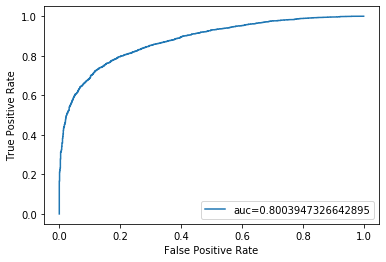

In [151]:
y_pred_train_prob = log_mod.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 2)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [152]:
# get the best threshold
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = threshold[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.566413


### 3. Lasso for Variable Selection

In [153]:
clf_logreg = LogisticRegression(penalty='l1', solver='liblinear',class_weight ='balanced')

In [154]:
clf_logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [155]:
y_pred_train = clf_logreg.predict(X_train)
y_pred_val = clf_logreg.predict(X_val)

In [156]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Lasso",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.4708    0.8200    0.5981      1139
           2     0.9476    0.7792    0.8552      4756

    accuracy                         0.7871      5895
   macro avg     0.7092    0.7996    0.7267      5895
weighted avg     0.8555    0.7871    0.8055      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4385    0.7605    0.5563       380
           2     0.9304    0.7667    0.8406      1586

    accuracy                         0.7655      1966
   macro avg     0.6845    0.7636    0.6985      1966
weighted avg     0.8353    0.7655    0.7857      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 934  205]
 [1050 3706]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 289   91]
 [ 370 1216]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304


## SMOTE

In [157]:
smote = SMOTE(random_state=123)                                     #Initiating smote
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)         #Fitting Sample   

### 4. Decision Tree Classifier

In [158]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=123,ccp_alpha =0.05)

# Train Decision Tree Classifer
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, class_weight='balanced',
                       random_state=123)

In [159]:
y_pred_train = clf_dt.predict(X_train)
y_pred_val = clf_dt.predict(X_val)

In [160]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.3421    0.8859    0.4936      1139
           2     0.9559    0.5921    0.7312      4756

    accuracy                         0.6489      5895
   macro avg     0.6490    0.7390    0.6124      5895
weighted avg     0.8373    0.6489    0.6853      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.3340    0.8658    0.4821       380
           2     0.9480    0.5864    0.7246      1586

    accuracy                         0.6404      1966
   macro avg     0.6410    0.7261    0.6033      1966
weighted avg     0.8293    0.6404    0.6777      1966


               Confusion Matrix FOR TRAIN DATA
            
[[1009  130]
 [1940 2816]]

               Confusion matrix FOR VALIDATION DATA
            
[[329  51]
 [656 930]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051


# Check important features

In [161]:
importances = clf_dt.feature_importances_

In [162]:
features = X_train.columns
importances = clf_dt.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,Visibility_mean_ori,ScheduledDepTime_Binned_x0_Noon,DayofMonth_x0_1,WindGustValue_max_des,StationHeight_des,Latitude_des,Longitude_des,Month_x0_1,Month_x0_3,Month_x0_5,...,DayofMonth_x0_28,DayofMonth_x0_29,DayofMonth_x0_30,DayofMonth_x0_31,DayOfWeek_x0_1,DayOfWeek_x0_2,DayOfWeek_x0_3,DayOfWeek_x0_4,DayOfWeek_x0_5,ScheduledTravelTime
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


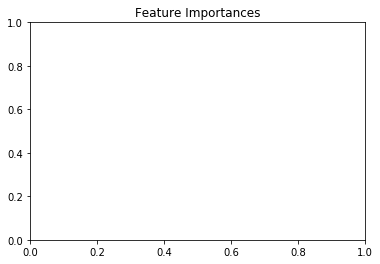

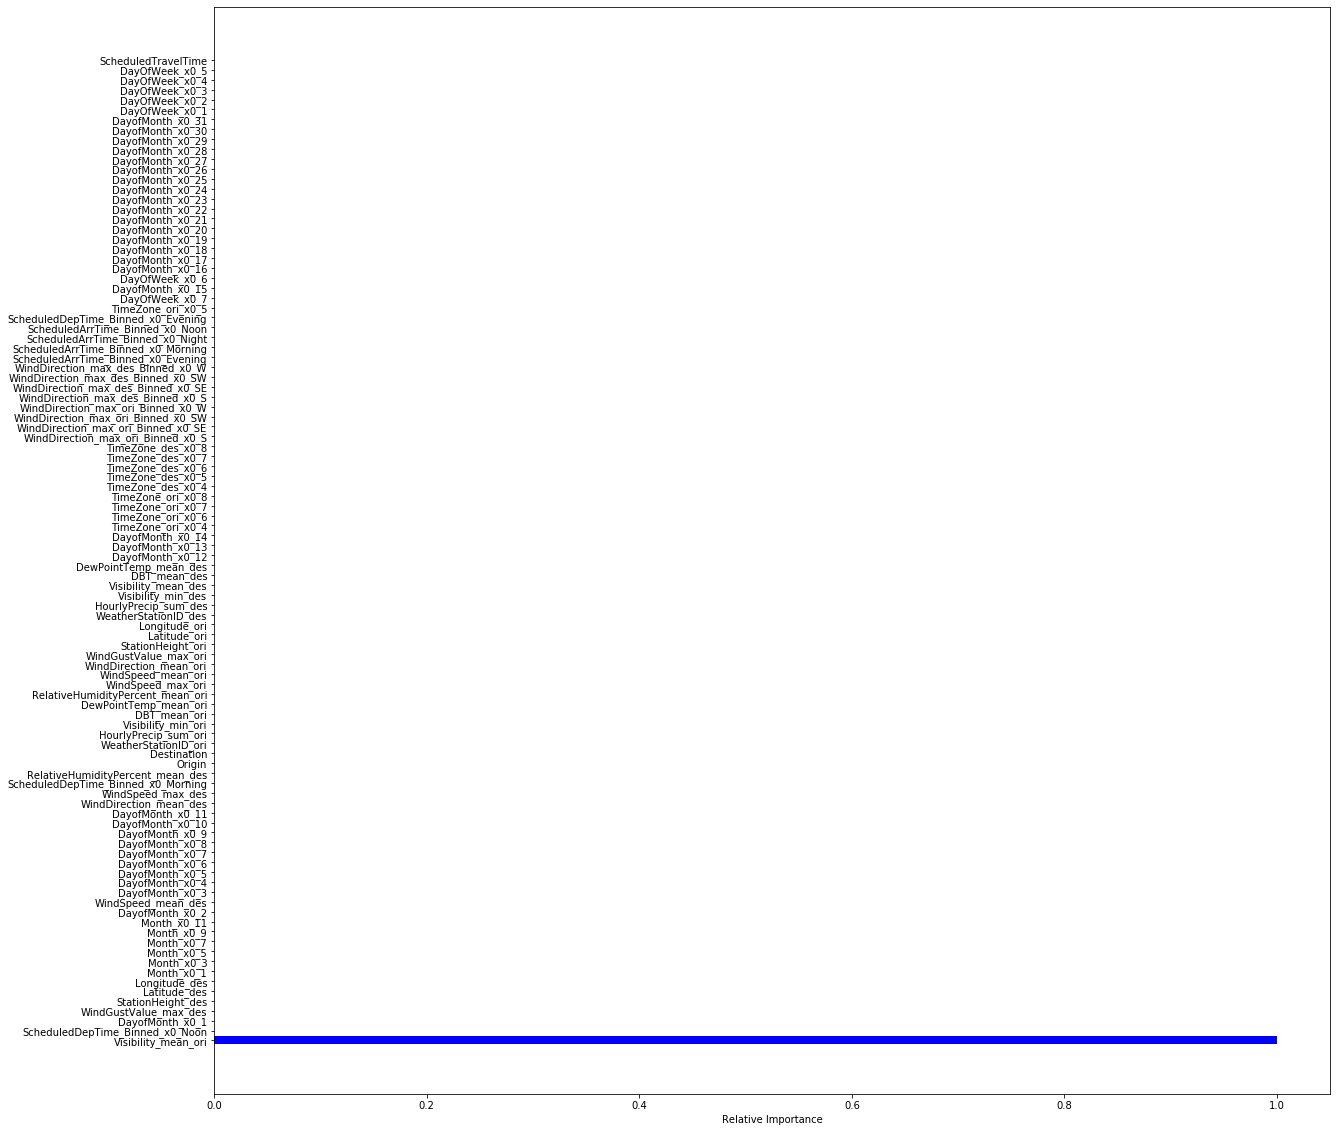

In [165]:
%matplotlib inline
plt.title('Feature Importances')
plt.figure(figsize =(20,20))
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Max_depth

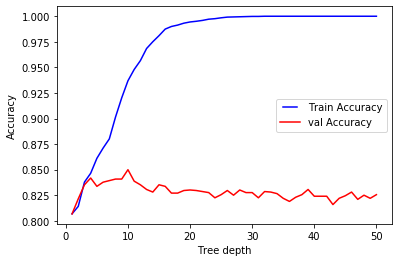

In [166]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

# DT with imp features and optimized tree depth

In [167]:
clf_dt_best=tree.DecisionTreeClassifier(max_depth=9)

In [168]:
# Train Decision Tree Classifer
clf_dt_best.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=9)

In [169]:
y_pred_train = clf_dt_best.predict(X_train_sm)
y_pred_val = clf_dt_best.predict(X_val)

In [170]:
scores = get_metrics(y_train_sm,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.8746    0.9340    0.9033      4756
           2     0.9292    0.8661    0.8965      4756

    accuracy                         0.9000      9512
   macro avg     0.9019    0.9000    0.8999      9512
weighted avg     0.9019    0.9000    0.8999      9512


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4164    0.6421    0.5052       380
           2     0.9014    0.7844    0.8388      1586

    accuracy                         0.7569      1966
   macro avg     0.6589    0.7132    0.6720      1966
weighted avg     0.8077    0.7569    0.7743      1966


               Confusion Matrix FOR TRAIN DATA
            
[[4442  314]
 [ 637 4119]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 244  136]
 [ 342 1244]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176


### 4. Decision Tree with Grid-Search CV - Hyper-parameter Tuning

In [171]:
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [4,7,8,9],
              "min_samples_leaf": [4, 8, 10, 12, 15],
               "max_leaf_nodes": [15,20,25,30,32,34,36],
              "ccp_alpha" : [0.001,0.002,0.005,0.01,0.03,0.05,0.1,0.2]
              }

In [172]:
dt = tree.DecisionTreeClassifier(random_state=123)
clf_dt_grid = GridSearchCV(dt, param_grid,cv=5,scoring='f1')
clf_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': [0.001, 0.002, 0.005, 0.01, 0.03, 0.05,
                                       0.1, 0.2],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 7, 8, 9],
                         'max_leaf_nodes': [15, 20, 25, 30, 32, 34, 36],
                         'min_samples_leaf': [4, 8, 10, 12, 15]},
             scoring='f1')

In [173]:
clf_dt_grid.best_params_

{'ccp_alpha': 0.001,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_leaf_nodes': 34,
 'min_samples_leaf': 12}

In [174]:
y_pred_train = clf_dt_grid.predict(X_train)
y_pred_val = clf_dt_grid.predict(X_val)

In [175]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree_BestParameters",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.4712    0.9131    0.6216      1139
           2     0.9732    0.7546    0.8501      4756

    accuracy                         0.7852      5895
   macro avg     0.7222    0.8339    0.7359      5895
weighted avg     0.8762    0.7852    0.8059      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4144    0.8158    0.5496       380
           2     0.9425    0.7238    0.8188      1586

    accuracy                         0.7416      1966
   macro avg     0.6785    0.7698    0.6842      1966
weighted avg     0.8405    0.7416    0.7668      1966


               Confusion Matrix FOR TRAIN DATA
            
[[1040   99]
 [1167 3589]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 310   70]
 [ 438 1148]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645


In [183]:
#y_pred_test = clf_dt_grid.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("dt_gridsearch.csv")



# ROC AUC Curve

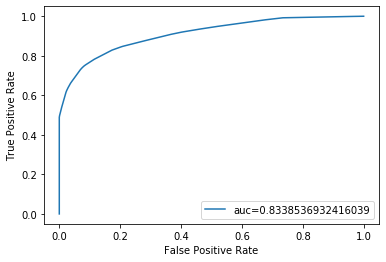

In [176]:
y_pred_train_prob = clf_dt_grid.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 2)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 5. Random Forest

In [177]:
Randomforest_model=RandomForestClassifier(n_estimators=20,max_depth=22,class_weight ='balanced')

In [178]:
Randomforest_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=22, n_estimators=20)

In [179]:
y_pred_train = Randomforest_model.predict(X_train)
y_pred_val = Randomforest_model.predict(X_val)

In [180]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.9974    0.9921    0.9947      1139
           2     0.9981    0.9994    0.9987      4756

    accuracy                         0.9980      5895
   macro avg     0.9977    0.9957    0.9967      5895
weighted avg     0.9980    0.9980    0.9980      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.7137    0.4395    0.5440       380
           2     0.8770    0.9578    0.9156      1586

    accuracy                         0.8576      1966
   macro avg     0.7953    0.6986    0.7298      1966
weighted avg     0.8454    0.8576    0.8438      1966


               Confusion Matrix FOR TRAIN DATA
            
[[1130    9]
 [   3 4753]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 167  213]
 [  67 1519]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974


# RF with imp features and optimized tree depth

In [181]:
Randomforest_model=RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_leaf=0.05,random_state = 1,class_weight =  "balanced_subsample")

In [182]:
Randomforest_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       min_samples_leaf=0.05, random_state=1)

In [183]:
y_pred_train = Randomforest_model.predict(X_train)
y_pred_val = Randomforest_model.predict(X_val)

In [184]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest imp",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.4227    0.8402    0.5624      1139
           2     0.9499    0.7252    0.8225      4756

    accuracy                         0.7474      5895
   macro avg     0.6863    0.7827    0.6925      5895
weighted avg     0.8480    0.7474    0.7722      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4152    0.8053    0.5479       380
           2     0.9398    0.7282    0.8206      1586

    accuracy                         0.7431      1966
   macro avg     0.6775    0.7668    0.6843      1966
weighted avg     0.8384    0.7431    0.7679      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 957  182]
 [1307 3449]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 306   74]
 [ 431 1155]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896


In [205]:
#y_pred_test = Randomforest_model.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("rf.csv")

## 6. PCA

In [185]:
from sklearn.decomposition import PCA
pca = PCA()
X_train1 = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([1.14720306e-01, 8.04238611e-02, 7.00468170e-02, 5.63489524e-02,
       5.50137570e-02, 5.33704176e-02, 4.99081461e-02, 3.92574795e-02,
       3.31142708e-02, 2.98535324e-02, 2.70778003e-02, 2.57795299e-02,
       2.33624155e-02, 2.19815203e-02, 1.91881317e-02, 1.83029289e-02,
       1.74577720e-02, 1.54715685e-02, 1.41249234e-02, 1.30942730e-02,
       1.27600039e-02, 1.23893923e-02, 1.18904997e-02, 1.09207070e-02,
       1.07656402e-02, 1.03711072e-02, 9.60047728e-03, 7.75068694e-03,
       7.65899159e-03, 6.95890872e-03, 6.73851029e-03, 5.89923464e-03,
       5.81458092e-03, 5.19786358e-03, 5.03264753e-03, 4.78355807e-03,
       4.33214827e-03, 4.30947651e-03, 4.22922681e-03, 4.10498267e-03,
       4.06902695e-03, 3.98265522e-03, 3.94472265e-03, 3.83118880e-03,
       3.73865710e-03, 3.65561644e-03, 3.59459494e-03, 3.48403840e-03,
       3.35427607e-03, 2.24228666e-03, 2.02674934e-03, 1.62756176e-03,
       1.49084382e-03, 1.43725487e-03, 1.41209520e-03, 1.18929034e-03,
      

In [186]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 34


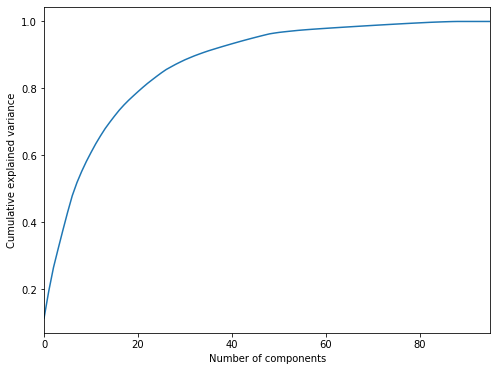

In [187]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,95,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [188]:
X_train_pca=X_train1[: ,0:35]
X_val_pca=pca.transform(X_val)[:,0:35]
print(X_train_pca.shape)
print(X_val_pca.shape)

(5895, 35)
(1966, 35)


In [189]:
logreg_pca = LogisticRegression(solver="liblinear",class_weight='balanced')
logreg_pca.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [190]:
y_pred_train = logreg_pca.predict(X_train_pca)
y_pred_val = logreg_pca.predict(X_val_pca)

In [191]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"PCA Logistic",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.4404    0.7884    0.5651      1139
           2     0.9375    0.7601    0.8395      4756

    accuracy                         0.7656      5895
   macro avg     0.6890    0.7743    0.7023      5895
weighted avg     0.8415    0.7656    0.7865      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4273    0.7579    0.5465       380
           2     0.9288    0.7566    0.8339      1586

    accuracy                         0.7569      1966
   macro avg     0.6780    0.7573    0.6902      1966
weighted avg     0.8319    0.7569    0.7784      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 898  241]
 [1141 3615]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 288   92]
 [ 386 1200]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490


In [192]:
test_pca=pca.transform(test_data)[:,0:34]

In [193]:
#y_pred_test = logreg_pca.predict(test_pca)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("pca_logistic.csv")

## 7. Gradient Boosting Classifier

In [194]:
clf_GBM = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [195]:
clf_GBM.fit(X=X_train, y=y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [196]:
y_pred_train = clf_GBM.predict(X_train)
y_pred_val = clf_GBM.predict(X_val)

In [197]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"GBM",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.8691    0.6471    0.7418      1139
           2     0.9203    0.9767    0.9477      4756

    accuracy                         0.9130      5895
   macro avg     0.8947    0.8119    0.8447      5895
weighted avg     0.9104    0.9130    0.9079      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.7418    0.5368    0.6229       380
           2     0.8959    0.9552    0.9246      1586

    accuracy                         0.8744      1966
   macro avg     0.8189    0.7460    0.7738      1966
weighted avg     0.8661    0.8744    0.8663      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 737  402]
 [ 111 4645]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 204  176]
 [  71 1515]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490
9,GBM,0.912977,0.647059,0.869104,0.741822,0.874364,0.536842,0.741818,0.622901


In [198]:
#y_pred_test = clf_GBM.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("GBM77_66.csv")

## 8. SVM

In [199]:
%%time
svc = SVC(class_weight ='balanced')
svc.fit(X_train,y_train)

Wall time: 4.58 s


SVC(class_weight='balanced')

In [200]:
y_pred_train = svc.predict(X_train)
y_pred_val = svc.predict(X_val)

##### Evaluating the model performance

In [201]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"SVM_balanced",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.6076    0.9640    0.7454      1139
           2     0.9900    0.8509    0.9152      4756

    accuracy                         0.8728      5895
   macro avg     0.7988    0.9075    0.8303      5895
weighted avg     0.9161    0.8728    0.8824      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4868    0.7763    0.5984       380
           2     0.9375    0.8039    0.8656      1586

    accuracy                         0.7986      1966
   macro avg     0.7121    0.7901    0.7320      1966
weighted avg     0.8504    0.7986    0.8139      1966


               Confusion Matrix FOR TRAIN DATA
            
[[1098   41]
 [ 709 4047]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 295   85]
 [ 311 1275]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490
9,GBM,0.912977,0.647059,0.869104,0.741822,0.874364,0.536842,0.741818,0.622901


### SVM with Grid Search for Paramater Tuning

In [202]:
## Use Grid Search for parameter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC()
 
param_grid = { 
                'C': [0.001, 0.01,0.05, 0.1, 1, 10, 100 ],
                'gamma': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly' ],
                'class_weight' : ['balanced',None]
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 5, scoring ='f1')

In [203]:
## Fit the grid search model
svc_cv_grid_f = svc_cv_grid.fit(X=X_train, y=y_train)

Executing shutdown due to inactivity...


2021-05-06 22:16:15,181 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-05-06 22:16:19,273 - INFO     - Executing shutdown...


In [204]:
# Get the best parameters
svc_cv_grid_f.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'poly'}

In [205]:
y_pred_train = svc_cv_grid_f.predict(X_train)
y_pred_val = svc_cv_grid_f.predict(X_val)

##### Evaluating the model performance

In [206]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"SVM_balanced",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.6780    0.9631    0.7958      1139
           2     0.9902    0.8905    0.9377      4756

    accuracy                         0.9045      5895
   macro avg     0.8341    0.9268    0.8667      5895
weighted avg     0.9299    0.9045    0.9103      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.5009    0.7105    0.5876       380
           2     0.9229    0.8304    0.8742      1586

    accuracy                         0.8072      1966
   macro avg     0.7119    0.7705    0.7309      1966
weighted avg     0.8414    0.8072    0.8188      1966


               Confusion Matrix FOR TRAIN DATA
            
[[1097   42]
 [ 521 4235]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 270  110]
 [ 269 1317]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490
9,GBM,0.912977,0.647059,0.869104,0.741822,0.874364,0.536842,0.741818,0.622901


In [207]:
#y_pred_test = svc_cv_grid_f.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("svm_grid.csv")

## 9. XGboost with gridsearch cross validation

In [208]:
xgb_base = XGBClassifier()

In [209]:
parameters = {'objective':['binary:logistic'],
              'learning_rate': [0.03,0.05,0.01,0.09,0.1], #so called `eta` value
              'max_depth': [6,8,10,15],
              'subsample': [0.7,0.5],
              'colsample_bytree': [0.6,0.5],
              'n_estimators': [50,100],
               'lambda':[0.01,0.05,0.1]}

In [210]:
#from sklearn.model_selection import GridSearchCV 
xgb_cv = GridSearchCV(xgb_base, param_grid = parameters,cv = 3)
xgb_cv.fit(X_train, y_train)
xgb_cv_saved = xgb_cv.best_estimator_

In [211]:
y_pred_train = xgb_cv_saved.predict(X_train)
y_pred_val = xgb_cv_saved.predict(X_val)

In [212]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"XGboost",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.9336    0.7287    0.8185      1139
           2     0.9383    0.9876    0.9623      4756

    accuracy                         0.9376      5895
   macro avg     0.9360    0.8582    0.8904      5895
weighted avg     0.9374    0.9376    0.9345      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.7863    0.5132    0.6210       380
           2     0.8923    0.9666    0.9280      1586

    accuracy                         0.8789      1966
   macro avg     0.8393    0.7399    0.7745      1966
weighted avg     0.8718    0.8789    0.8686      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 830  309]
 [  59 4697]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 195  185]
 [  53 1533]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490
9,GBM,0.912977,0.647059,0.869104,0.741822,0.874364,0.536842,0.741818,0.622901


## 10. Stacking

In [214]:
models = [log_mod, clf_logreg, clf_dt_grid, Randomforest_model, logreg_pca, clf_GBM, svc]

__The stacking function takes several inputs:__

* models: the first level models we defined earlier
* X_train, y_train, X_test: our data
* regression: Boolean indicating whether we want to use the function for regression. In our case its set to False, since this is a classification
* mode: using the earlier describe out-of-fold during cross-validation
* needs_proba: Boolean indicating whether you need the probabilities of class labels
* save_dir: save the result to directory Boolean
* metric: what evaluation metric to use (we imported the accuracy_score in the beginning)
* n_folds: how many folds to use for cross-validation
* stratified: whether to use stratified cross-validation
* shuffle: whether to shuffle the data
* random_state: setting a random state for reproducibility
* verbose: 2 here refers to printing all info


In [215]:
S_train, S_val = stacking(models,                   
                           X_train, y_train, X_val,   
                           regression=False,  
                           needs_proba=False,
                           save_dir=None,             
                           metric=f1_score, 
                           n_folds=4, 
                           stratified=True,
                           shuffle=True,  
                           random_state=0,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [7]

model  0:     [LogisticRegression]
    fold  0:  [0.58761528]
    fold  1:  [0.58344284]
    fold  2:  [0.60583016]
    fold  3:  [0.54545455]
    ----
    MEAN:     [0.58058571] + [0.02196053]
    FULL:     [0.58083442]

model  1:     [LogisticRegression]
    fold  0:  [0.58947368]
    fold  1:  [0.58388375]
    fold  2:  [0.60991105]
    fold  3:  [0.54664915]
    ----
    MEAN:     [0.58247941] + [0.02284291]
    FULL:     [0.58270799]

model  2:     [GridSearchCV]
    fold  0:  [0.57863145]
    fold  1:  [0.55618615]
    fold  2:  [0.58041958]
    fold  3:  [0.56603774]
    ----
    MEAN:     [0.57031873] + [0.00986389]
    FULL:     [0.57024057]

model  3:     [RandomForestClassifier]
    fold  0:  [0.56501182]
    fold  1:  [0.54437870]
    fold  2:  [0.55454545]
    fold  3:  [0.52224824]
    ----
    MEAN:     [0.54654605] + [0.01581183]
    FULL:     [0.546

In [216]:
## Stacked Logistic Balanced Model

log_bal = LogisticRegression(class_weight = 'balanced')
   
log_bal.fit(S_train, y_train)

y_pred_train = log_bal.predict(S_train)
y_pred_val =  log_bal.predict(S_val)
scores = get_metrics(y_train, y_pred_train, y_val, y_pred_val, "Stacking_log_bal", scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.5187    0.7919    0.6268      1139
           2     0.9430    0.8240    0.8795      4756

    accuracy                         0.8178      5895
   macro avg     0.7308    0.8080    0.7532      5895
weighted avg     0.8610    0.8178    0.8307      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4769    0.7895    0.5946       380
           2     0.9402    0.7926    0.8601      1586

    accuracy                         0.7920      1966
   macro avg     0.7086    0.7910    0.7274      1966
weighted avg     0.8506    0.7920    0.8088      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 902  237]
 [ 837 3919]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 300   80]
 [ 329 1257]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490
9,GBM,0.912977,0.647059,0.869104,0.741822,0.874364,0.536842,0.741818,0.622901


In [217]:
## Stacked Decision Tree Model

dt_stack=tree.DecisionTreeClassifier(class_weight ='balanced', max_depth=9)
   
dt_stack.fit(S_train, y_train)

y_pred_train = dt_stack.predict(S_train)
y_pred_val =  dt_stack.predict(S_val)
scores = get_metrics(y_train, y_pred_train, y_val, y_pred_val, "Stacking_dt", scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           1     0.5135    0.8349    0.6359      1139
           2     0.9535    0.8106    0.8762      4756

    accuracy                         0.8153      5895
   macro avg     0.7335    0.8227    0.7561      5895
weighted avg     0.8685    0.8153    0.8298      5895


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           1     0.4787    0.8000    0.5990       380
           2     0.9429    0.7913    0.8605      1586

    accuracy                         0.7930      1966
   macro avg     0.7108    0.7956    0.7297      1966
weighted avg     0.8532    0.7930    0.8099      1966


               Confusion Matrix FOR TRAIN DATA
            
[[ 951  188]
 [ 901 3855]]

               Confusion matrix FOR VALIDATION DATA
            
[[ 304   76]
 [ 331 1255]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogisticRegression,0.852417,0.450395,0.677675,0.541139,0.831638,0.378947,0.602510,0.465267
1,LogisticRegression_Balanced,0.787277,0.821773,0.471062,0.598848,0.764496,0.757895,0.437026,0.554379
2,Lasso,0.787108,0.820018,0.470766,0.598143,0.765514,0.760526,0.438543,0.556304
3,DecisionTree,0.648855,0.885865,0.342150,0.493640,0.640387,0.865789,0.334010,0.482051
4,DecisionTree,0.900021,0.933978,0.874582,0.903305,0.756867,0.642105,0.416382,0.505176
5,DecisionTree_BestParameters,0.785242,0.913082,0.471228,0.621638,0.741607,0.815789,0.414439,0.549645
6,Random Forest,0.997964,0.992098,0.997352,0.994718,0.857579,0.439474,0.713675,0.543974
7,Random Forest imp,0.747413,0.840211,0.422703,0.562445,0.743133,0.805263,0.415197,0.547896
8,PCA Logistic,0.765564,0.788411,0.440412,0.565135,0.756867,0.757895,0.427300,0.546490
9,GBM,0.912977,0.647059,0.869104,0.741822,0.874364,0.536842,0.741818,0.622901
